In [20]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import statsmodels.stats.multicomp as mc

import pandas as pd
from pandas import Grouper

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

   # Load data and subset

<Item title:"SAC_Rangeland_Assessment_2020_2021" type:Feature Layer Collection owner:Anooshi>
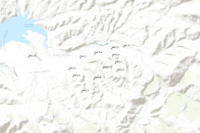

In [27]:
# Load data from arcGIS online
output = arcGIS_data_load('b2104f77d1fc42a1944761efad7d0136')

data = output['data0']
feature_service = output['feature_service']

In [28]:
# Subset data for desired year.
data.rename(columns={"SurveyDate": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 5


,OBJECTID,Habitat_Ty,BHRSite,Surveyor1,Surveyor2,DomSpeci_2,GlobalID,PctCover,BareGround,GrazeLevel,GrazeImpact,RangeScore,ForageQual,Rills,WatFlow,PedTer,Gully,Erode1,Litter,Erode2,Plant1,Compact,Func,NNIP,Plant3,Observation_Date,Comments_L,Soil_Surf_Loss,RDM_Plot_Number,Complete,SHAPE
55,56,Non-native grassland,SAC,Kevin Sherrill,Silas Ellison,Avena sp.,93c1f474-07f2-4625-a1fe-2f24c6138152,96.0,4.0,Low,Moderate,NaN,5.0,No,No,Yes,Yes,No,No,4.0,5.0,No,High,Low,Moderate,2021-03-25 19:29:52,Good mixture of native plants throughout. Some...,2,None,Yes,"{""x"": 6187354.168308202, ""y"": 2035646.84803884..."
57,58,Non-native grassland,SAC,Silas Ellison,Kevin Sherrill,Erodium botrys,019288a4-5b82-4d39-8af5-a4f3b3a1356a,65.0,35.0,High,High,NaN,3.0,No,No,Yes,No,No,No,4.0,2.0,Yes,Moderate,Low,Low,2021-03-25 18:20:09,"Significant terracetring, soil compaction, and...",None,None,Yes,"{""x"": 6187082.732996204, ""y"": 2035388.02077719..."
63,64,Non-native grassland,SAC,Kevin Sherrill,Silas Ellison,Erodium botrys,d5e5a704-d50b-4844-b15f-814eea98ef54,92.0,2.0,Moderate,High,NaN,4.0,No,No,Yes,No,No,No,4.0,3.0,No,Moderate,Low,Low,2021-03-25 17:38:03,"Some terracettes present, steep slope. Erodium...",4,None,Yes,"{""x"": 6185925.952414213, ""y"": 2035992.07609151..."
66,67,Non-native grassland,SAC,Silas Ellison,Kevin Sherrill,Avena sp.,2faecac6-718b-432a-b5af-a4d0751a2479,98.0,2.0,Moderate,Low,NaN,5.0,No,No,No,No,No,No,4.0,5.0,No,High,Low,Low,2021-03-25 16:37:46,None,2,None,Yes,"{""x"": 6185120.490960353, ""y"": 2035408.20867411..."
90,91,Oak Savanna,SAC,Silas Ellison,Kevin Sherrill,Other Spp (see Comments),681e1cde-76de-45f1-820e-f26350b202b3,95.0,5.0,Moderate,Low,NaN,2.0,Yes,Yes,Yes,Yes,No,No,4.0,5.0,No,High,Moderate,Low,2021-03-25 19:59:00,Medusa head skeletons and abundant Ranunculus ...,2,None,Yes,"{""x"": 6186414.611311299, ""y"": 2036255.26738238..."


## QAQC

In [6]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 5
# of columns:
 31


In [7]:
subtoexport = (sub.columns.drop("PctCover"))


In [8]:

subtoexport


Index(['OBJECTID', 'Habitat_Ty', 'BHRSite', 'Surveyor1', 'Surveyor2',
       'DomSpeci_2', 'GlobalID', 'BareGround', 'GrazeLevel', 'GrazeImpact',
       'RangeScore', 'ForageQual', 'Rills', 'WatFlow', 'PedTer', 'Gully',
       'Erode1', 'Litter', 'Erode2', 'Plant1', 'Compact', 'Func', 'NNIP',
       'Plant3', 'Observation_Date', 'Comments_L', 'Soil_Surf_Loss',
       'RDM_Plot_Number', 'Complete', 'SHAPE'],
      dtype='object')

# QAQC Find blank entries in specific columns
find_blank_entries(data,['Surveyor2', 'Zone', 'Erode4', 'Habitat_Ty', 'BHRSite'])



/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


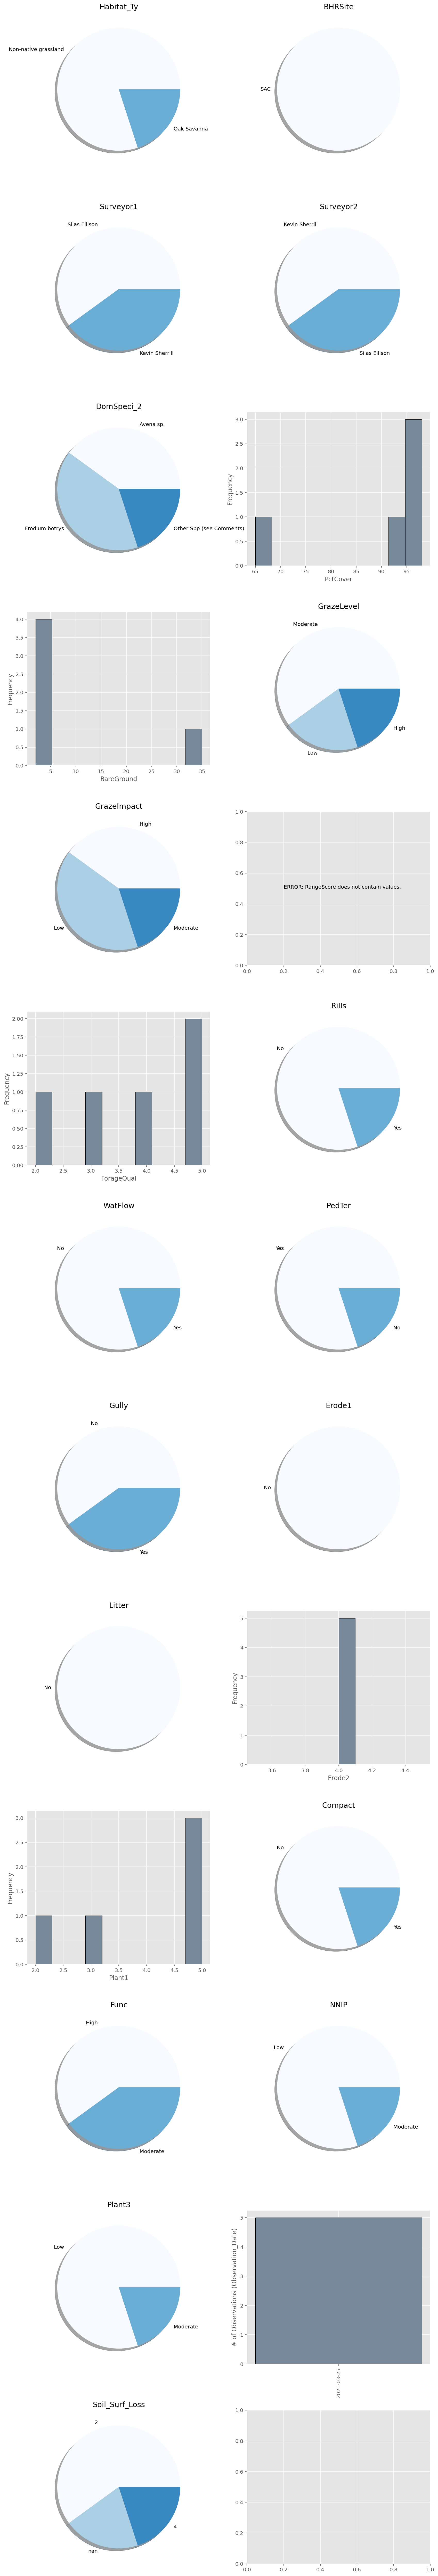

In [9]:
# QAQC Visualize data
QAQC_plot(sub, ['Habitat_Ty', 'BHRSite', 'Surveyor1', 'Surveyor2',
       'DomSpeci_2', 'PctCover', 'BareGround', 'GrazeLevel',
       'GrazeImpact', 'RangeScore', 'ForageQual', 'Rills', 'WatFlow', 'PedTer',
       'Gully', 'Erode1', 'Litter', 'Erode2', 'Plant1', 'Compact', 'Func',
       'NNIP', 'Plant3', 'Observation_Date',  'Soil_Surf_Loss'])

ERROR: DomSpeci_2 does not contain values.
ERROR: GrazeLevel does not contain values.
ERROR: GrazeImpact does not contain values.
ERROR: Compact does not contain values.
ERROR: Func does not contain values.
ERROR: NNIP does not contain values.
ERROR: RangeScore does not contain values.


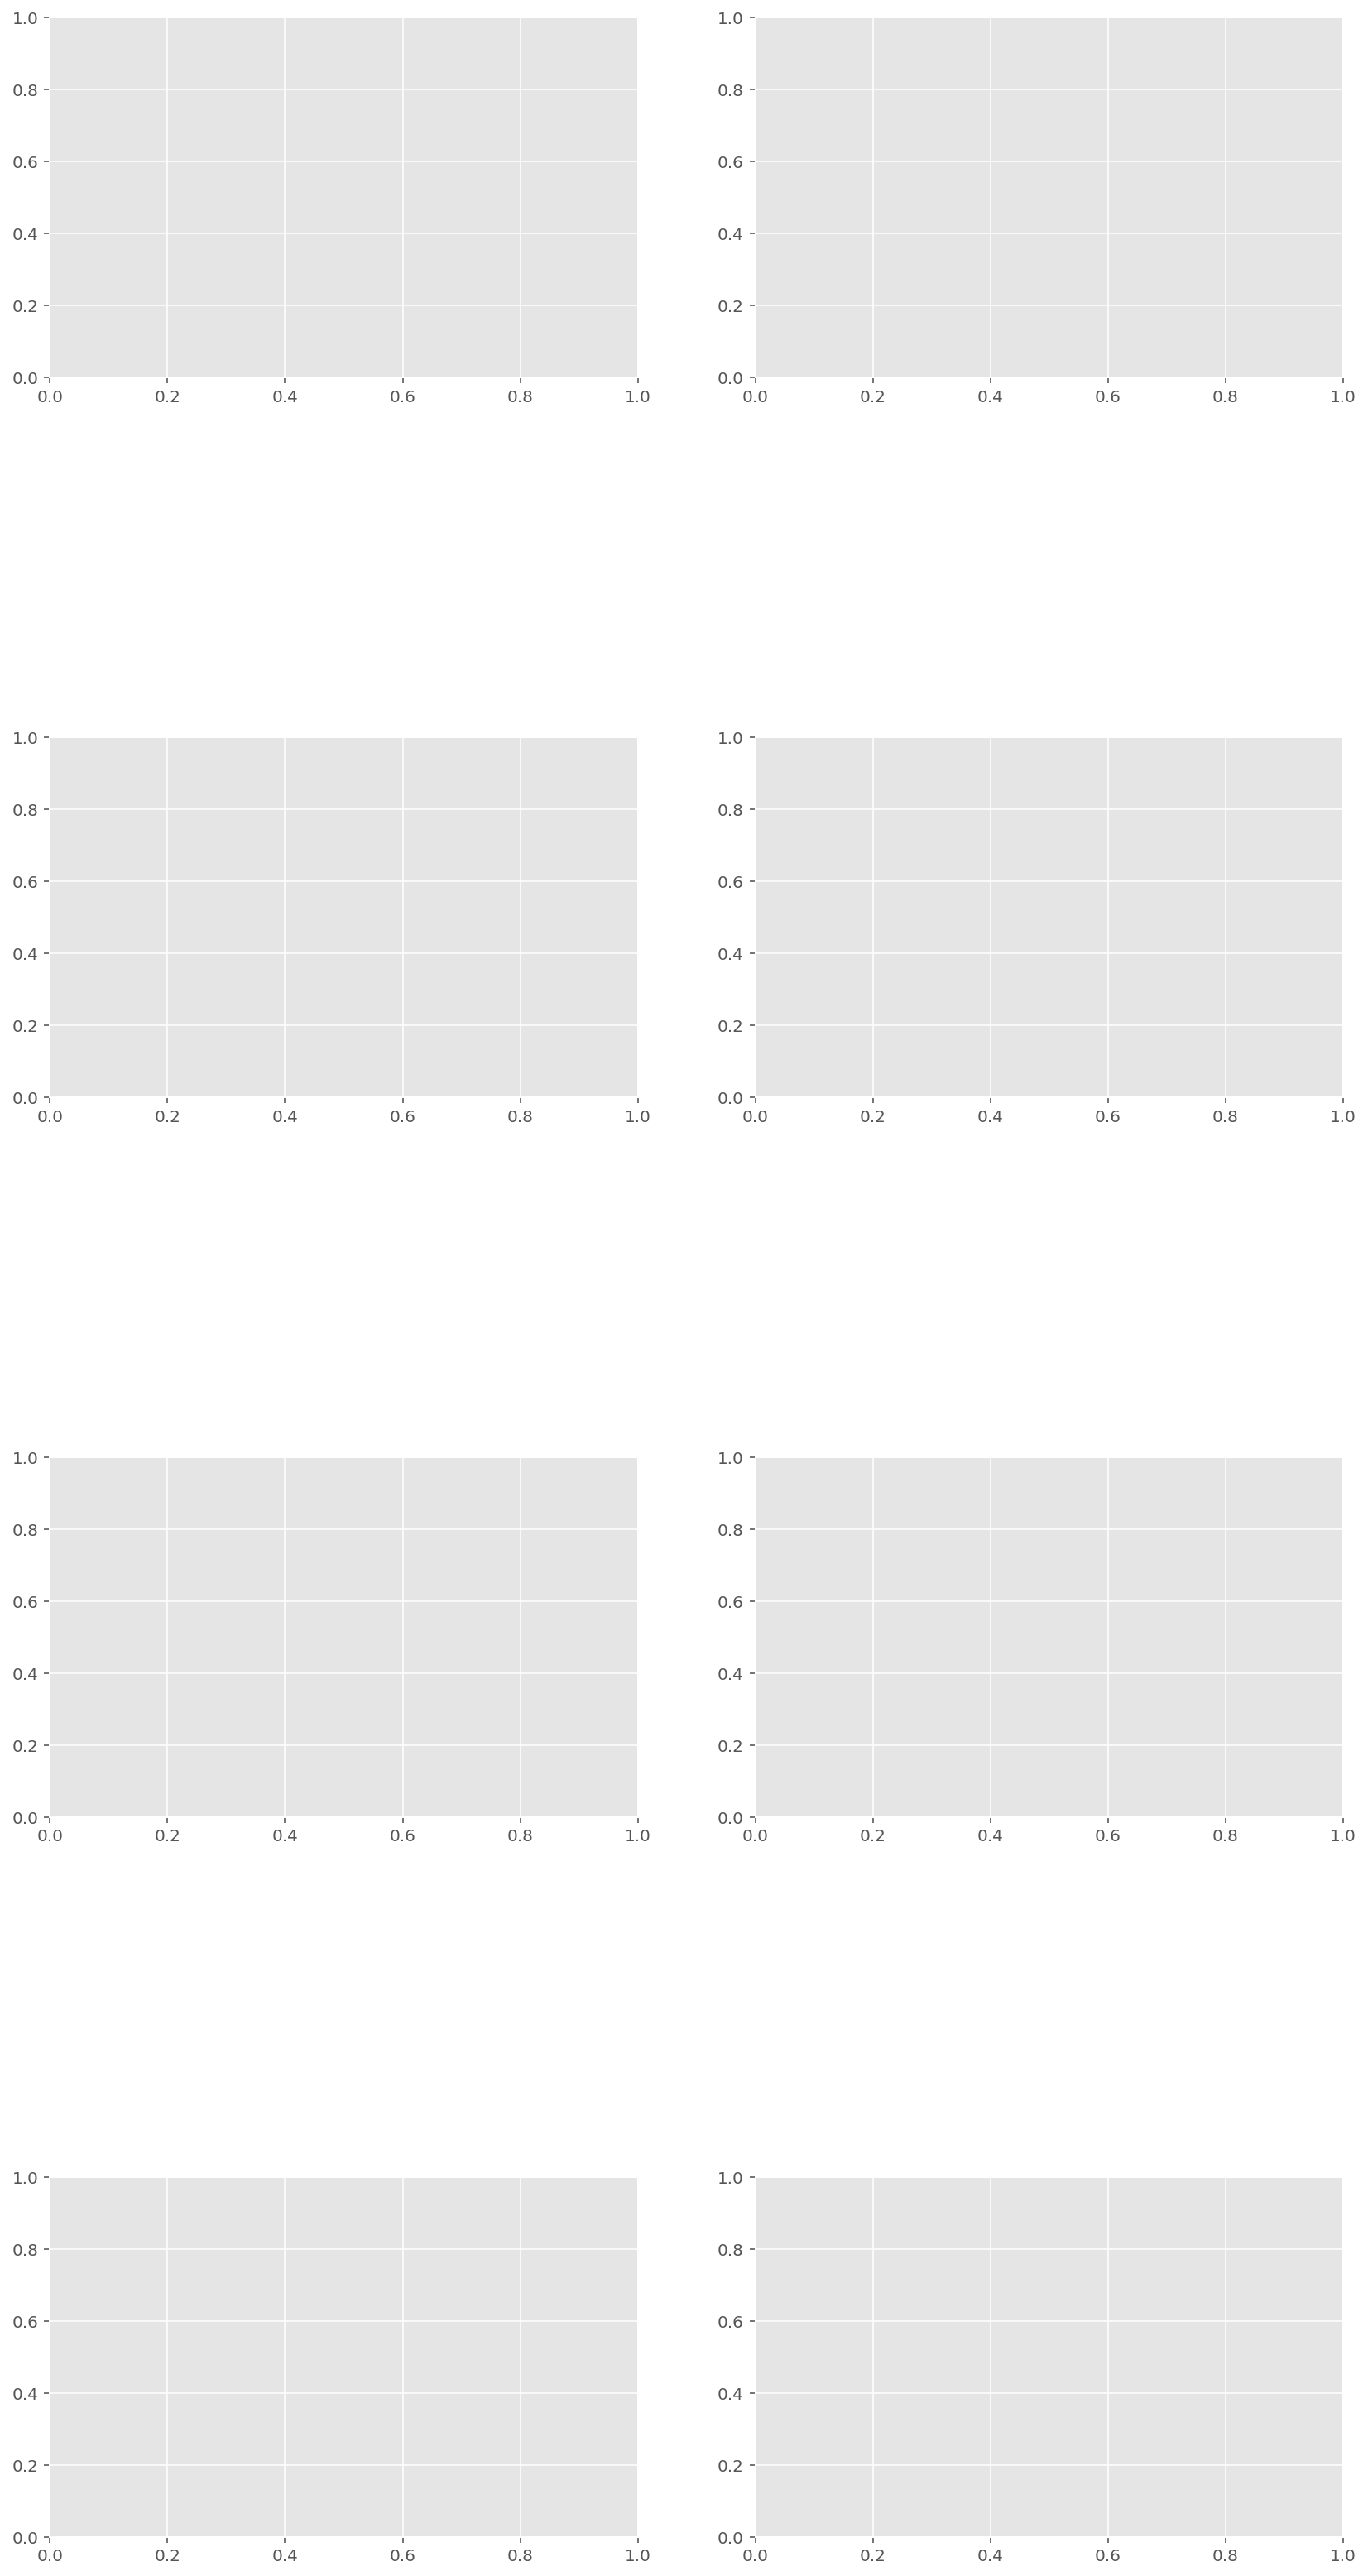

In [10]:
compare_years_catagorical(data,['DomSpeci_2', 'GrazeLevel', 'GrazeImpact', 'Compact', 'Func', 'NNIP','RangeScore' ], '2019', '2020')

Dropping surveyors with less than 0.25 observations
They did not make over 5% of total observation
Dropping Surveyors: []


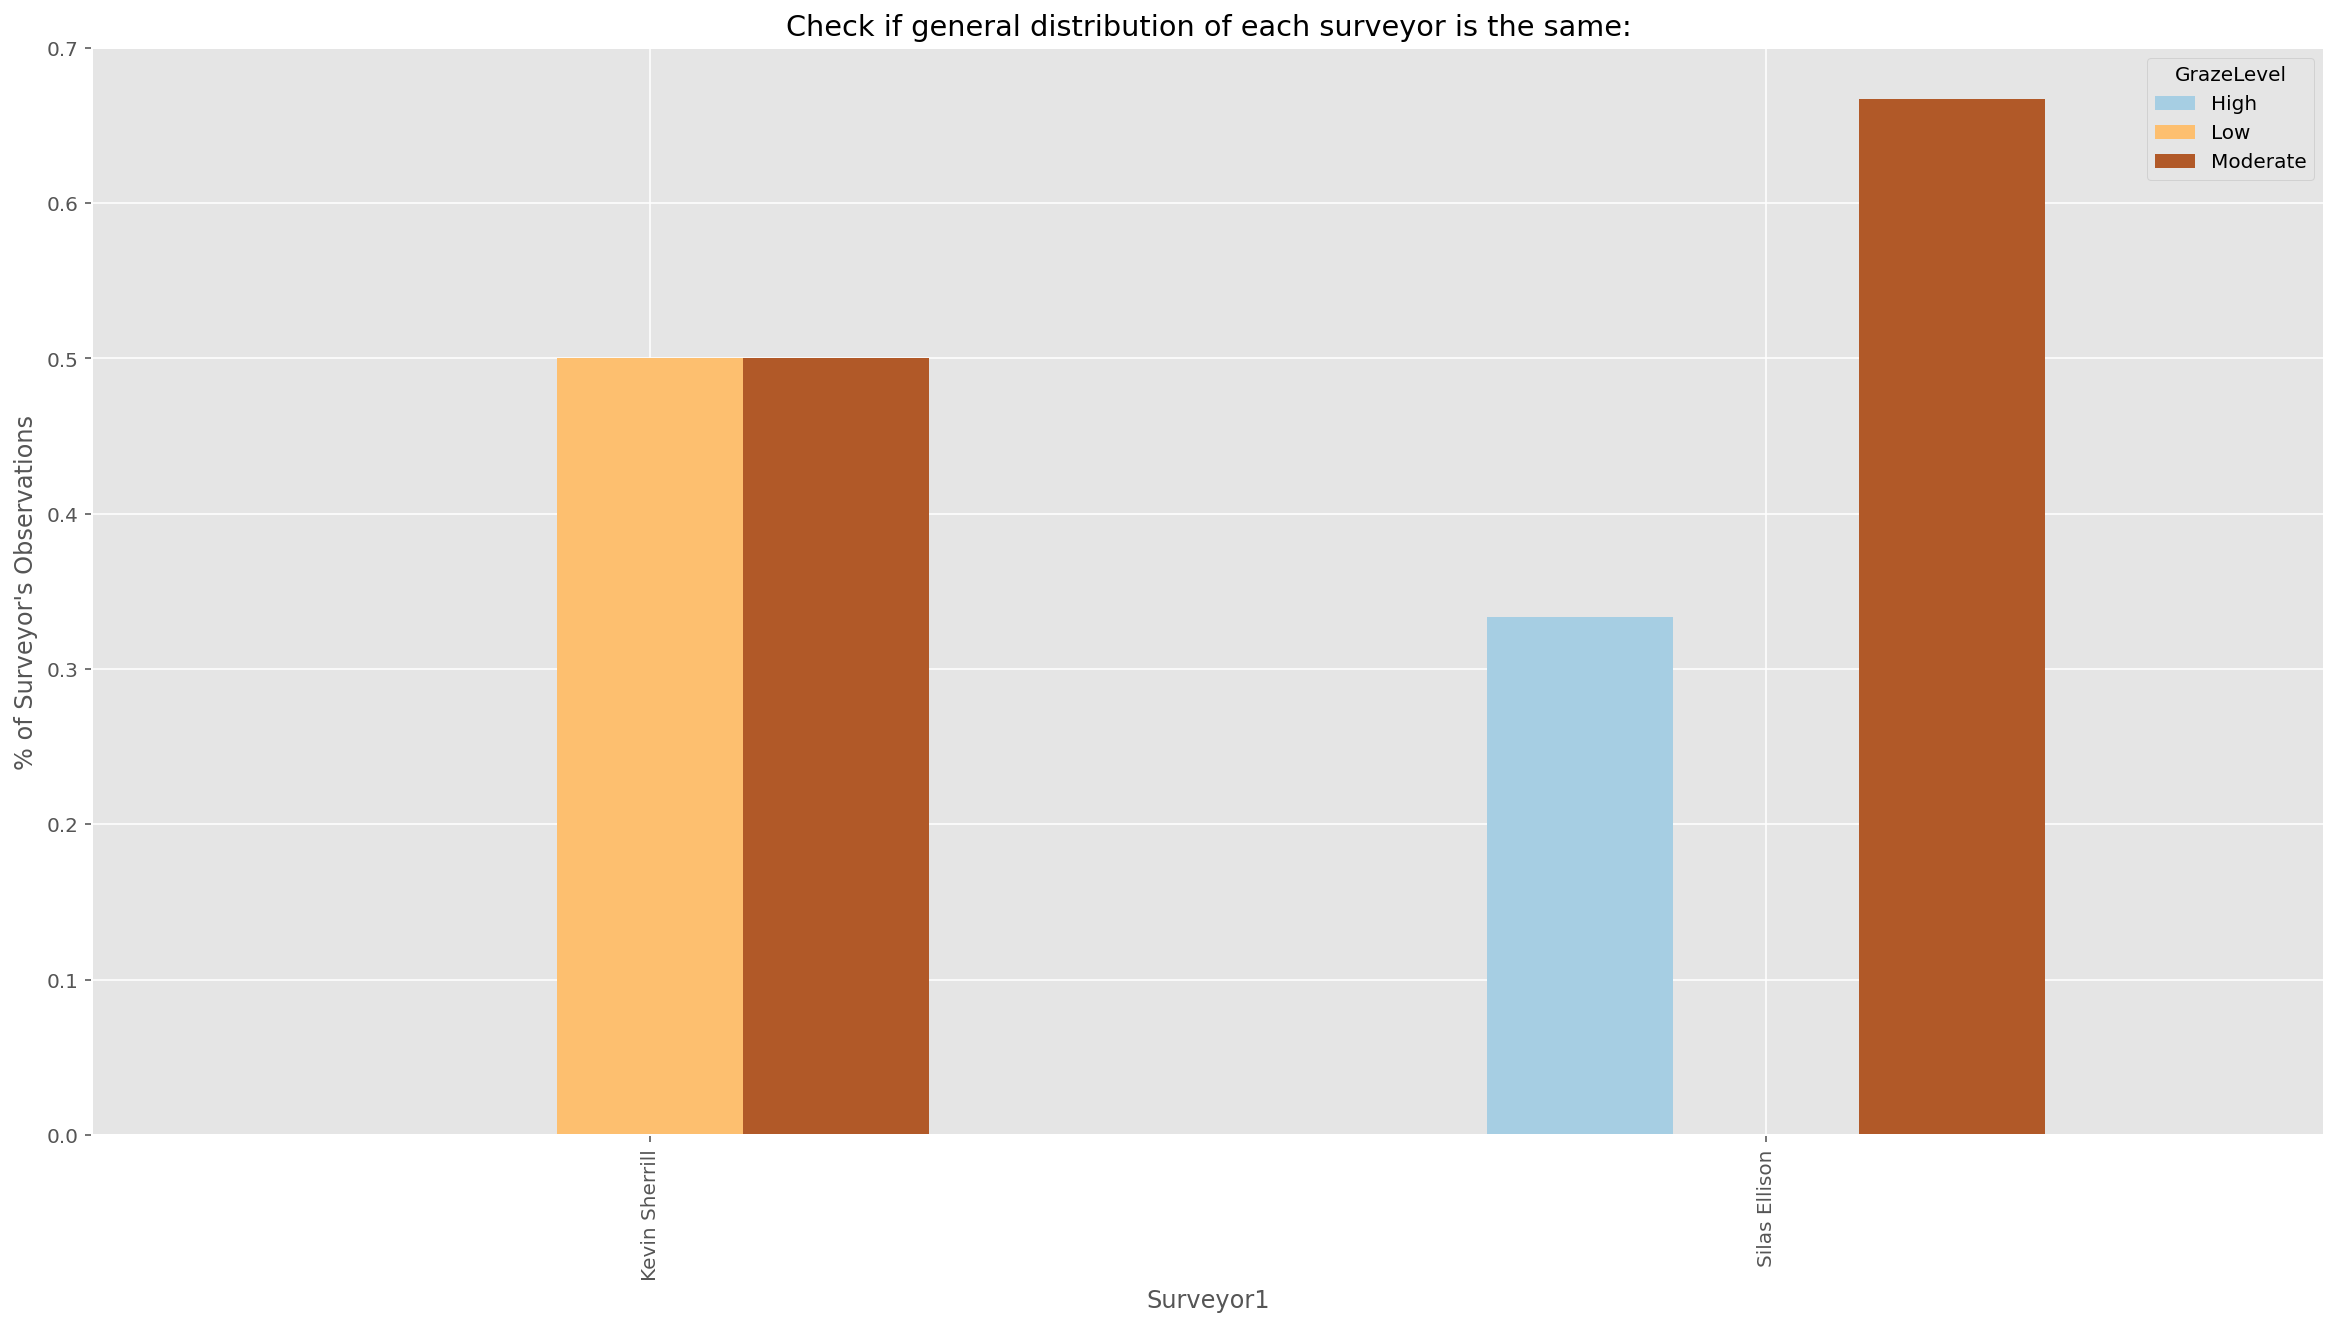

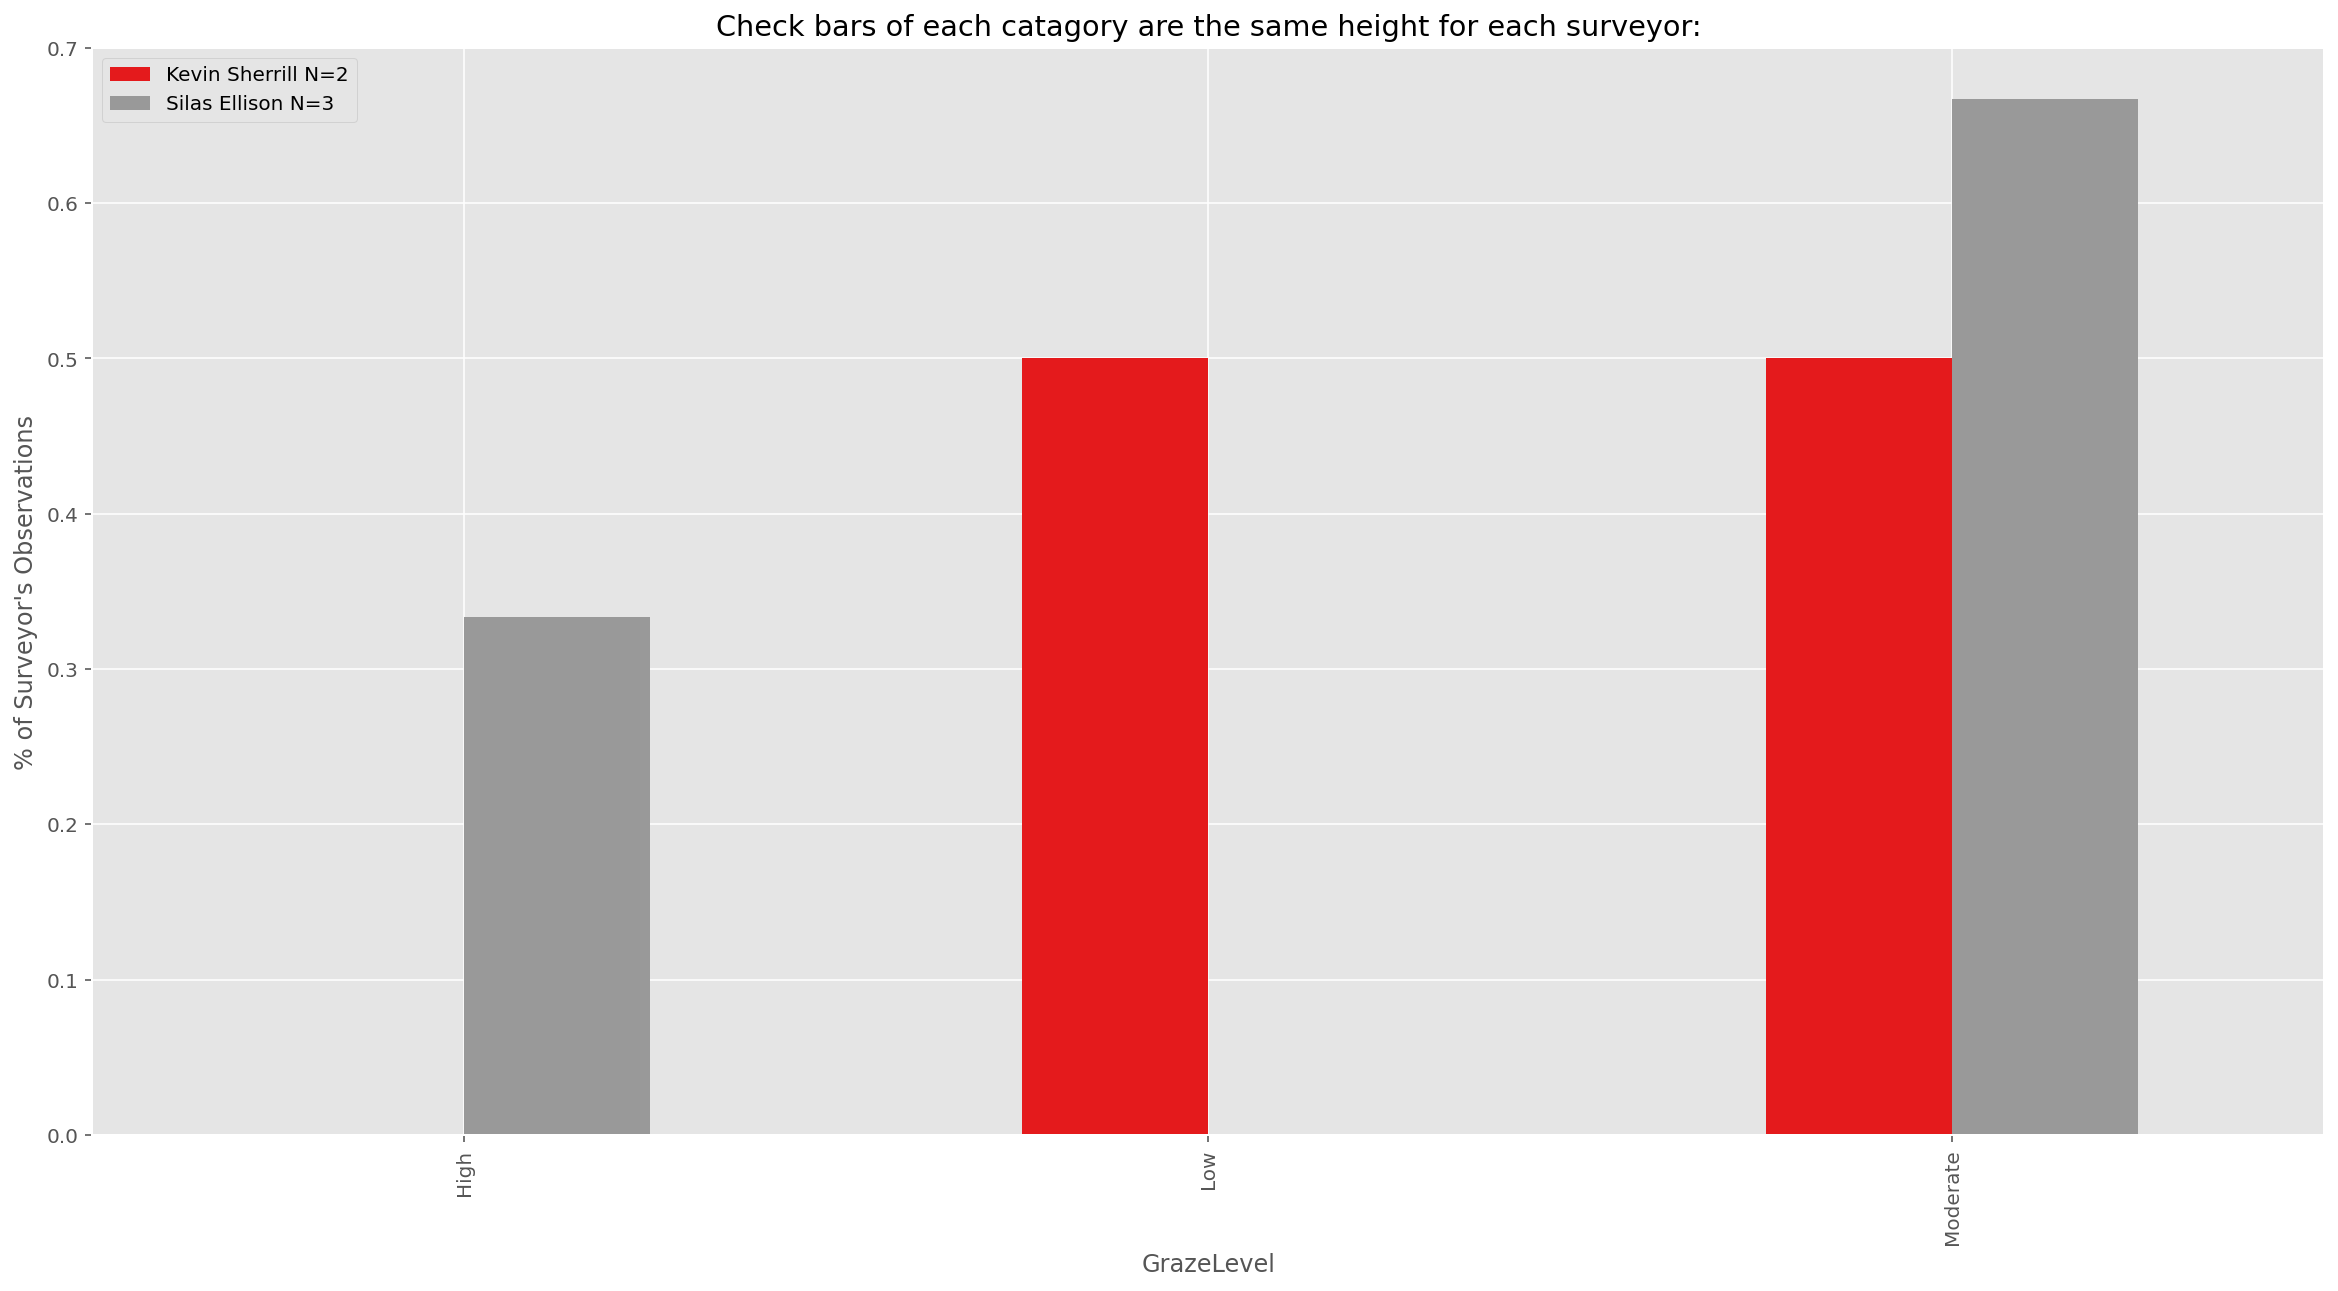

In [11]:
compare_surveyors(sub, 'GrazeLevel', 'Surveyor1', 5)

Dropping surveyors with less than 0.5 observations
They did not make over 5% of total observation
Dropping Surveyors: []


/tmp/ipykernel_6390/1485694213.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'RangeScore', 'Surveyor1', 5)
/tmp/ipykernel_6390/1485694213.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'RangeScore', 'Surveyor1', 5)


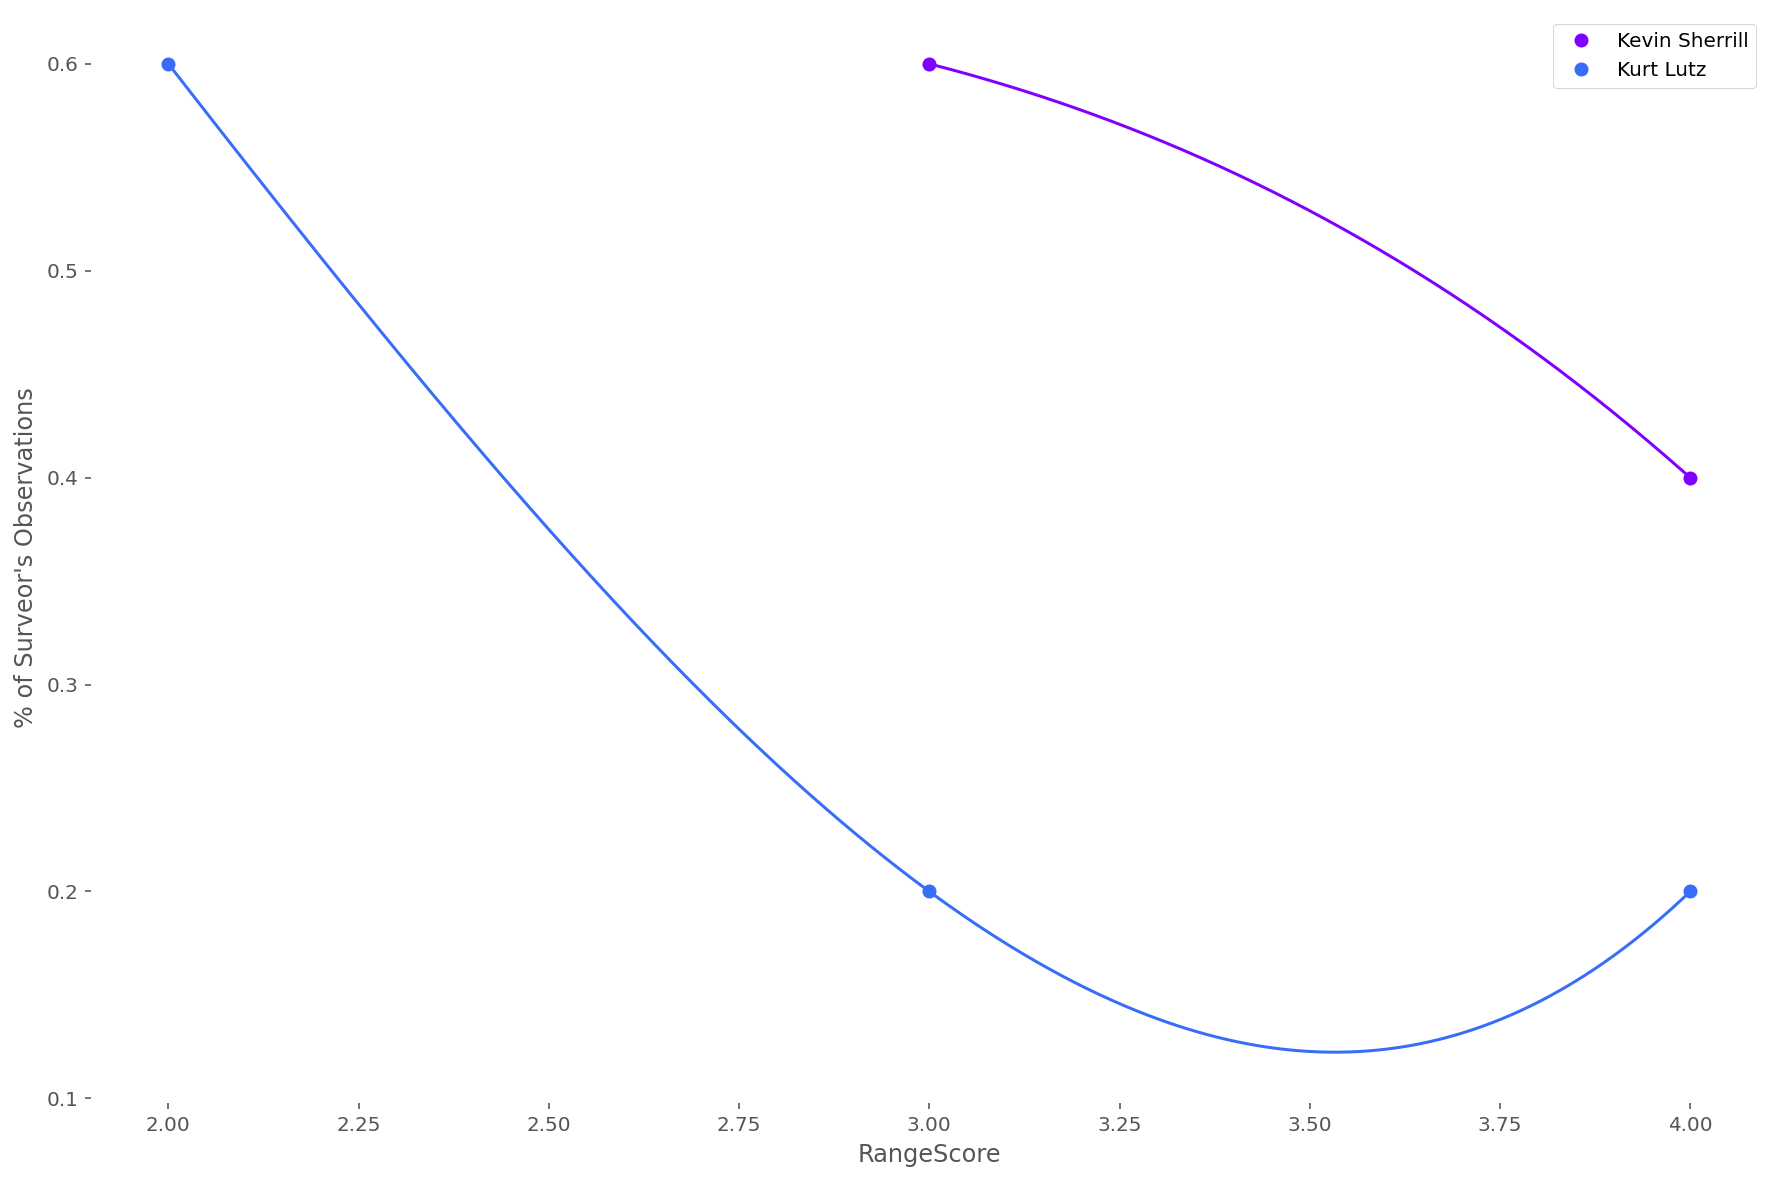

In [56]:
compare_surveyors(sub, 'RangeScore', 'Surveyor1', 5)

ERROR: GrazeLevel does not contain values.
ERROR: Soil_Surf_Loss does not contain values.


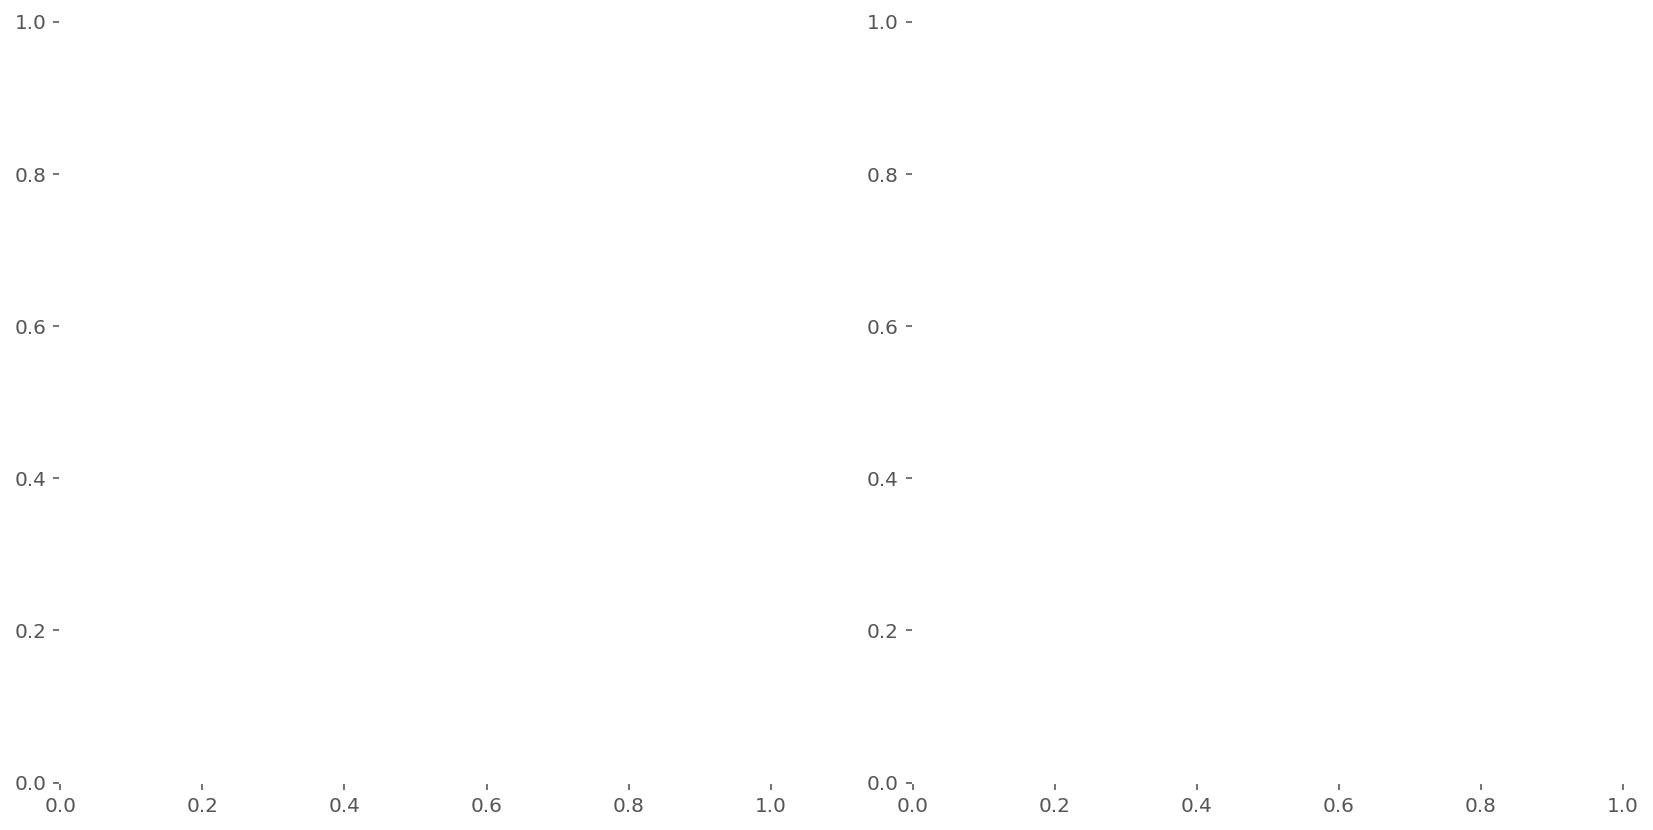

In [12]:
compare_years_catagorical(data, ['GrazeLevel', 'Soil_Surf_Loss'],'2019','2020')

In [60]:
QAQC_attachment_filenames(feature_service)

Found mislabeled photo attachement(s):
SAC_Rangeland_Assessment
Object ID: 69  Current Name:  attachment1.jpg
Object ID: 69  Current Name:  attachment2.jpg
Object ID: 70  Current Name:  attachment1.jpg
Object ID: 70  Current Name:  attachment2.jpg
Object ID: 71  Current Name:  attachment1.jpg
Object ID: 71  Current Name:  attachment2.jpg
Object ID: 71  Current Name:  attachment3.jpg


Object ID: 72  Current Name:  attachment1.jpg
Object ID: 72  Current Name:  attachment2.jpg
Object ID: 72  Current Name:  attachment3.jpg
Object ID: 73  Current Name:  attachment1.jpg
Object ID: 73  Current Name:  attachment2.jpg
Object ID: 73  Current Name:  attachment3.jpg
Object ID: 74  Current Name:  attachment1.jpg
Object ID: 74  Current Name:  attachment2.jpg
Object ID: 74  Current Name:  attachment3.jpg
Object ID: 74  Current Name:  attachment4.jpg
Object ID: 74  Current Name:  attachment5.jpg


Object ID: 75  Current Name:  attachment1.jpg
Object ID: 75  Current Name:  attachment2.jpg
Object ID: 75  Current Name:  attachment3.jpg
Object ID: 76  Current Name:  attachment1.jpg
Object ID: 76  Current Name:  attachment2.jpg
Object ID: 77  Current Name:  attachment1.jpg
Object ID: 77  Current Name:  attachment2.jpg


Object ID: 78  Current Name:  attachment1.jpg
Object ID: 78  Current Name:  attachment2.jpg
Object ID: 78  Current Name:  attachment3.jpg
Object ID: 79  Current Name:  attachment1.jpg
Object ID: 79  Current Name:  attachment2.jpg


Object ID: 80  Current Name:  attachment1.jpg
Object ID: 80  Current Name:  attachment2.jpg
Object ID: 81  Current Name:  attachment1.jpg
Object ID: 81  Current Name:  attachment2.jpg
Object ID: 81  Current Name:  attachment3.jpg
Object ID: 82  Current Name:  attachment2.jpg
Object ID: 82  Current Name:  attachment3.jpg
Object ID: 82  Current Name:  attachment3.jpg


Object ID: 83  Current Name:  attachment1.jpg
Object ID: 83  Current Name:  attachment2.jpg
Object ID: 84  Current Name:  attachment1.jpg
Object ID: 84  Current Name:  attachment2.jpg
Object ID: 85  Current Name:  attachment1.jpg
Object ID: 85  Current Name:  attachment2.jpg


Object ID: 86  Current Name:  attachment1.jpg
Object ID: 86  Current Name:  attachment2.jpg
Object ID: 87  Current Name:  attachment1.jpg
Object ID: 87  Current Name:  attachment2.jpg
Object ID: 87  Current Name:  attachment3.jpg
Object ID: 88  Current Name:  attachment1.jpg
Object ID: 88  Current Name:  attachment2.jpg


Object ID: 89  Current Name:  attachment1.jpg
Object ID: 89  Current Name:  attachment2.jpg
Object ID: 89  Current Name:  attachment3.jpg
Object ID: 90  Current Name:  attachment1.jpg
Object ID: 90  Current Name:  attachment2.jpg


Object ID: 91  Current Name:  attachment1.jpg
Object ID: 91  Current Name:  attachment2.jpg
Object ID: 91  Current Name:  attachment3.jpg


# Analysis

In [61]:
data.head

<bound method NDFrame.head of      OBJECTID_12 Habitat_Ty BHRSite             Surveyor1  \
0             13       None     SAC           Rusty Hutto   
1             14       None     SAC           Rusty Hutto   
2             15       None     SAC           Rusty Hutto   
3             16       None     SAC           Rusty Hutto   
4             17       None     SAC           Rusty Hutto   
5             18       None     SAC           Rusty Hutto   
6             19       None     SAC           Rusty Hutto   
7             20       None     SAC           Rusty Hutto   
8             21       None     SAC           Rusty Hutto   
9             22       None     SAC           Rusty Hutto   
10            24       None     SAC           Joy Stewart   
11            25       None     SAC           Joy Stewart   
12            26       None     SAC           Joy Stewart   
13            27       None     SAC           Joy Stewart   
14            28       None     SAC           Rusty Hut

In [62]:
#Seperates out the data by months for use in later plots


data['month'] = pd.DatetimeIndex(data['Observation_Date']).month

results = data.copy()

# Converts plot number strings to their corresponding correct soil type

results['months']=data['month']

results

,OBJECTID_12,Habitat_Ty,BHRSite,Surveyor1,Surveyor2,DomSpeci_2,GlobalID,PctCover,BareGround,GrazeLevel,GrazeImpact,RangeScore,ForageQual,Rills,WatFlow,PedTer,Gully,Erode1,Litter,Erode2,Plant1,Compact,Func,NNIP,Plant3,Observation_Date,Comments_L,Soil_Surf_Loss,RDM_Plot_Number,SHAPE,month,months
0,13,None,SAC,Rusty Hutto,Joy Stewart,Hordeum murinum ssp. leporinum,2adf180e-fe4e-43a1-a835-d9ab995cb9a3,95.0,5.0,Low,Low,4.0,5.0,No,No,No,No,No,Yes,4.0,1.0,No,Low,Low,Low,2018-03-29 17:28:29,SSLD - 1,1,None,"{""x"": 6185868.6211414635, ""y"": 2033969.6594117...",3.0,3.0
1,14,None,SAC,Rusty Hutto,Joy Stewart,Festuca bromoides,70fd7222-6381-4f20-b47a-2b55a315f056,97.0,3.0,Low,Moderate,3.0,4.0,No,No,Yes,No,No,Yes,2.0,2.0,No,Moderate,Moderate,Low,2018-03-29 18:31:46,A few pedestals evident. Medusa from previous ...,1,None,"{""x"": 6186296.770875722, ""y"": 2034508.56811080...",3.0,3.0
2,15,None,SAC,Rusty Hutto,Joy Stewart,Annual grass (Unidentifiable),4c411ce4-c7e6-44a3-912b-b9e39a14548d,92.0,8.0,Low,High,3.0,4.0,No,No,No,Yes,No,Yes,2.0,1.0,No,Low,Low,Low,2018-03-29 18:40:55,Start of small gully. Functional groups betwee...,2,None,"{""x"": 6186173.705176964, ""y"": 2035073.66803047...",3.0,3.0
3,16,None,SAC,Rusty Hutto,Joy Stewart,Annual grass (Unidentifiable),09639d42-dac0-4d31-a54e-7b39b1b08296,100.0,0.0,Low,Low,4.0,4.0,No,No,No,No,No,Yes,2.0,1.0,No,Moderate,Low,Low,2018-03-29 18:59:31,Dominant unid annual grass.,1,None,"{""x"": 6185482.691139057, ""y"": 2034697.87022563...",3.0,3.0
4,17,None,SAC,Rusty Hutto,Joy Stewart,Annual grass (Unidentifiable),84ed1680-71ba-4c43-b4a3-106a9dd5df76,98.0,2.0,Low,Low,4.0,4.0,No,No,No,No,No,Yes,4.0,1.0,No,Moderate,Moderate,Low,2018-03-29 19:24:03,Dominant unid annual grass. Medusa evident thr...,1,None,"{""x"": 6184689.663525641, ""y"": 2034915.42786139...",3.0,3.0
5,18,None,SAC,Rusty Hutto,Joy Stewart,Annual grass (Unidentifiable),9a5298dc-527f-4a17-9017-5f2e7bac90be,99.0,1.0,Low,Low,3.0,4.0,Yes,No,No,No,No,Yes,4.0,4.0,No,High,Low,Moderate,2018-03-29 20:10:44,Dominant plant unid annual grass. SSLR - 3. Re...,3,None,"{""x"": 6186249.28278172, ""y"": 2036361.839010566...",3.0,3.0
6,19,None,SAC,Rusty Hutto,Joy Stewart,Festuca bromoides,cd83f19b-81ca-4c92-a46e-b2cc9676ab52,80.0,20.0,Low,Moderate,3.0,4.0,No,No,No,No,No,Yes,4.0,4.0,No,Low,Low,Low,2018-03-29 20:34:06,SSLD - slight.,1,None,"{""x"": 6187053.6952148825, ""y"": 2036582.0580583...",3.0,3.0
7,20,None,SAC,Rusty Hutto,Joy Stewart,Annual grass (Unidentifiable),319e824a-6b66-4525-9bd0-6b2ff66e3271,100.0,0.0,Low,Moderate,3.0,4.0,No,No,No,Yes,No,Yes,4.0,4.0,No,Low,Moderate,Low,2018-03-29 20:43:47,Dominant unid annual grass. SSLD -Slight. NNIP...,1,None,"{""x"": 6187545.339900881, ""y"": 2036345.63563089...",3.0,3.0
8,21,None,SAC,Rusty Hutto,Joy Stewart,Other Spp (see Comments),5765fb1c-382c-4a96-8a41-a0b6d2c83b5c,100.0,0.0,Low,Low,4.0,5.0,No,No,No,No,No,Yes,4.0,4.0,No,Low,Low,Low,2018-03-29 21:03:49,Dominant hordeum spp.,1,None,"{""x"": 6185972.18753539, ""y"": 2036587.705356732...",3.0,3.0
9,22,None,SAC,Rusty Hutto,Joy Stewart,Festuca bromoides,8e3eb218-f72e-4347-be91-d7ebff616d6a,95.0,5.0,Low,Low,4.0,5.0,No,Yes,No,No,No,Yes,2.0,1.0,No,Low,Low,Low,2018-03-29 16:56:16,Soil surface loss and degradation score = 1.,1,None,"{""x"": 6185794.23415114, ""y"": 2033470.078389898...",3.0,3.0


In [63]:
#Create year column
data['Year'] = data.Observation_Date.dt.year

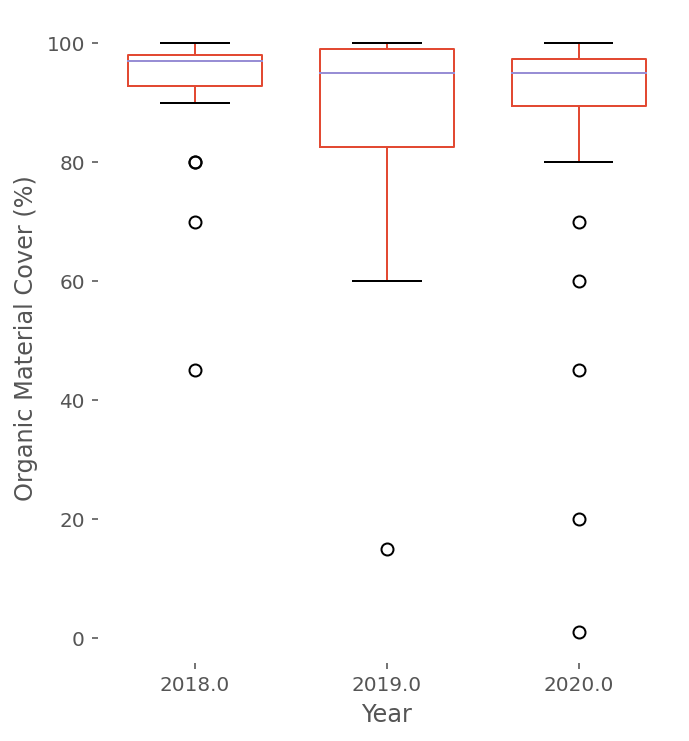

In [64]:
data.boxplot('PctCover', by='Year', grid=False, figsize=(5,6), widths=(.7, 0.7, .7))
plt.title("")
plt.suptitle("")
plt.ylabel('Organic Material Cover (%)')
ax = plt.gca()

In [65]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(data['PctCover'], data['GrazeLevel'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#A tukey HSD test may not be appropriate here because this is % data (bound by 0 and 100)

#Any comparisons where reject = True means there is a difference between the two groups

TypeError: '<' not supported between instances of 'NoneType' and 'str'

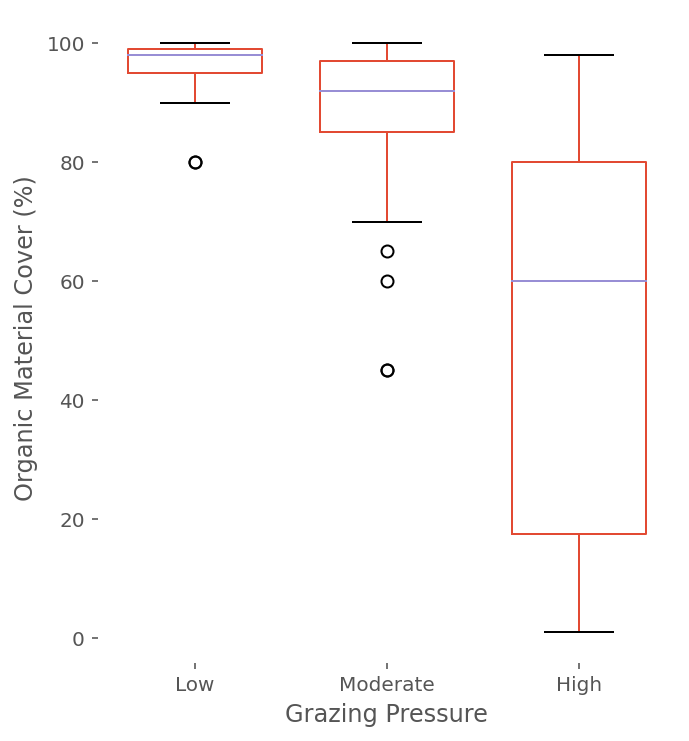

In [15]:
data.boxplot('PctCover', by='GrazeLevel', grid=False, figsize=(5,6), widths=(.7, 0.7, .7),positions=[2,0,1])
plt.title("")
plt.suptitle("")
plt.ylabel('Organic Material Cover (%)')
plt.xlabel('Grazing Pressure')
ax = plt.gca()

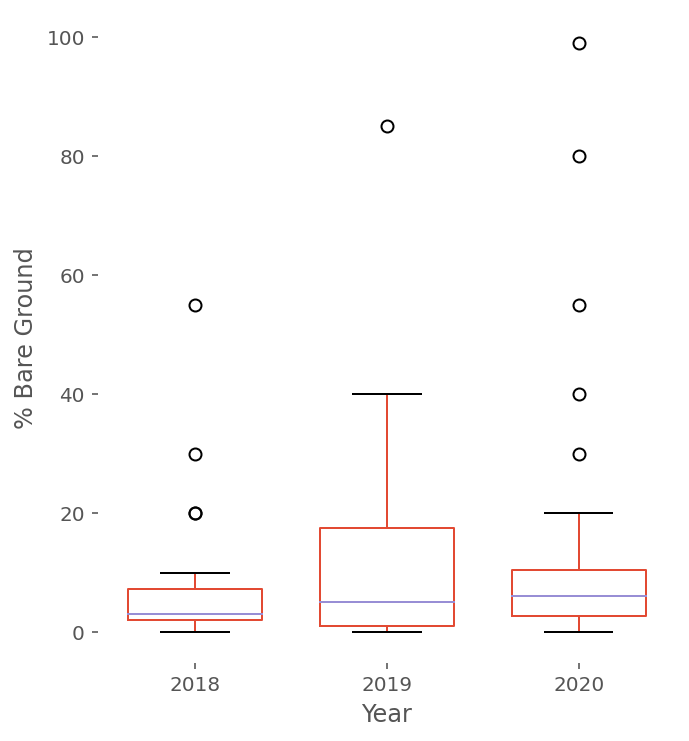

In [16]:
data.boxplot('BareGround', by='Year', grid=False, figsize=(5,6), widths=(.7, 0.7, .7))
plt.title("")
plt.suptitle("")
plt.ylabel('% Bare Ground')
ax = plt.gca()

In [17]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(data['BareGround'], data['GrazeLevel'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#A tukey HSD test may not be appropriate here because this is % data (bound by 0 and 100)

#Any comparisons where reject = True means there is a difference between the two groups

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-45.9408,0.001,-58.6052,-33.2764,True
High,Moderate,-38.2793,0.001,-50.5802,-25.9785,True
Low,Moderate,7.6614,0.0103,1.5212,13.8017,True


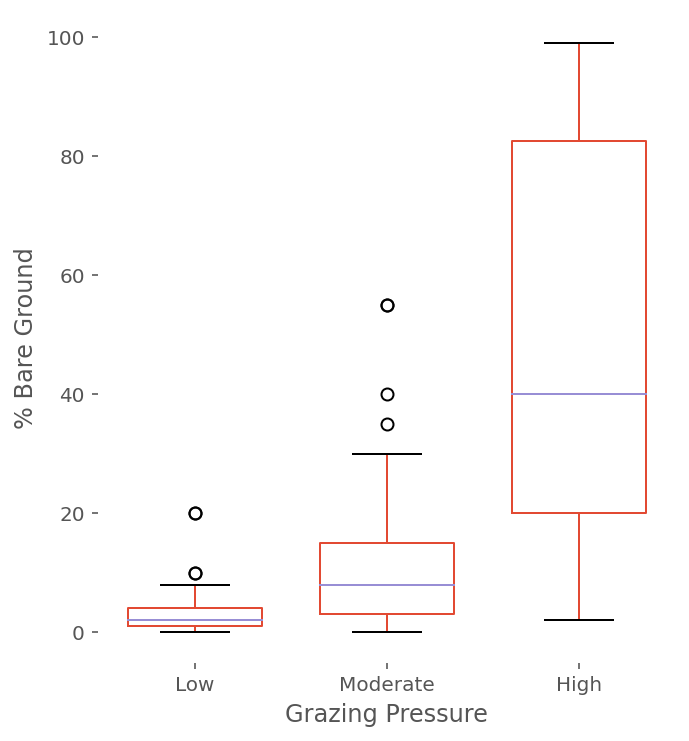

In [18]:
data.boxplot('BareGround', by='GrazeLevel', grid=False, figsize=(5,6), widths=(.7, 0.7, .7),positions=[2,0,1])
plt.title("")
plt.suptitle("")
plt.ylabel('% Bare Ground')
plt.xlabel('Grazing Pressure')
ax = plt.gca()

In [19]:
# Count of observations per year
obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by var
pct = data.groupby(['Year','GrazeLevel']).size() / obs_count_by_year *100

#Turn into dataframe
pct_df = pct.unstack()

#Reorder columns
pct_df = pct_df[['Low','Moderate','High']]

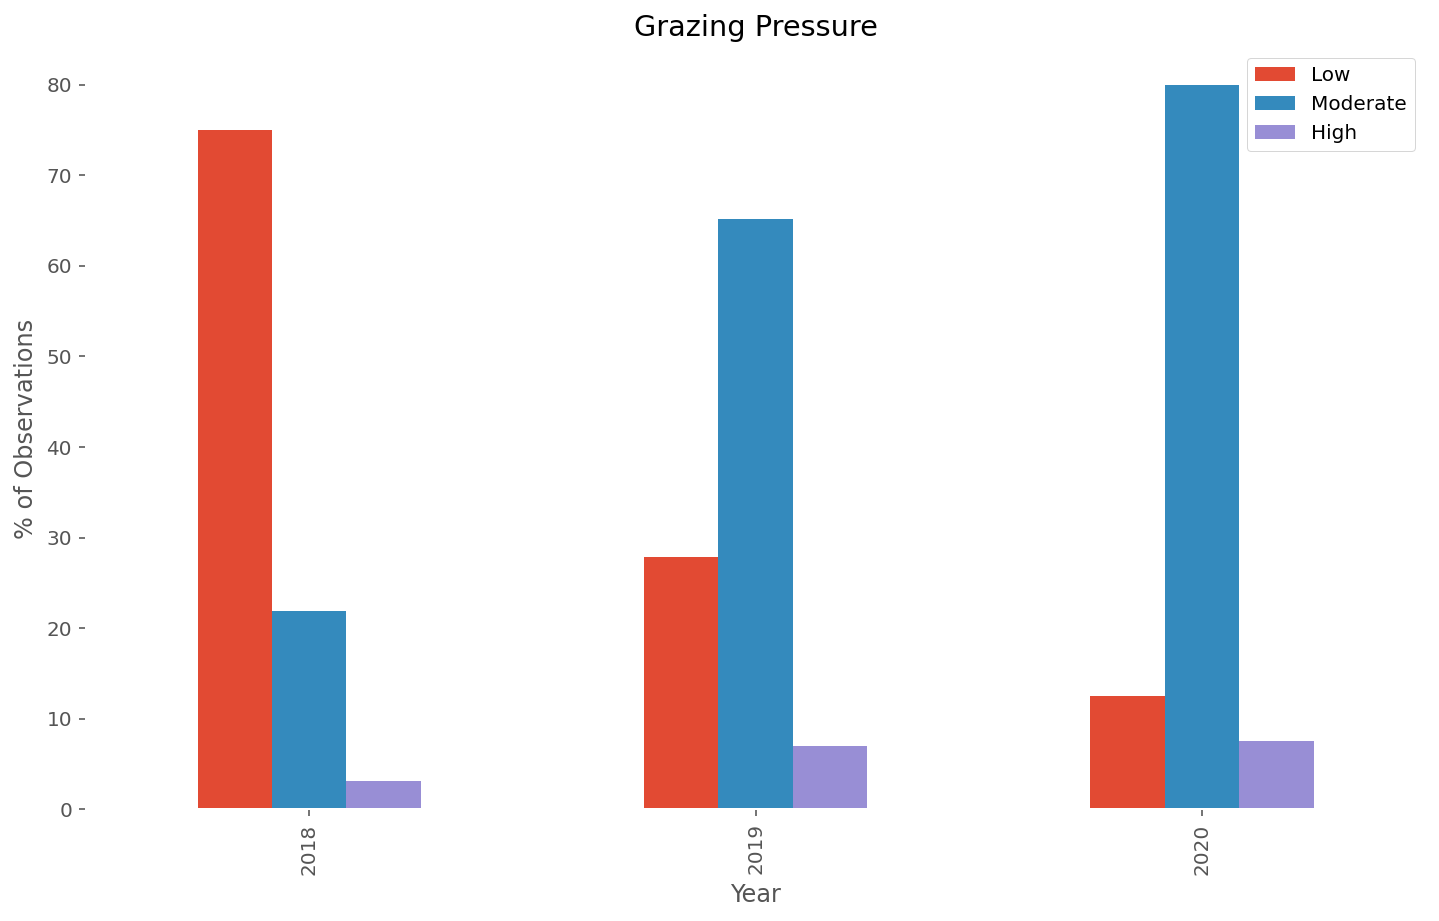

In [20]:
#Bar plot
axes = pct_df.plot.bar()
axes.set_ylabel('% of Observations')
axes.set_xlabel('Year')
axes.set_title('Grazing Pressure')
axes.legend(title='')

In [6]:
# Count of observations per year
obs_count_by_year = data.groupby('Year').size()

# Percent of obsevations by grazing impact levels
impact_pct = data.groupby(['Year','GrazeImpact']).size() / obs_count_by_year *100

#Turn into dataframe
impact_pct_df = impact_pct.unstack()

#Reorder columns
impact_pct_df = impact_pct_df[['Low','Moderate','High']]

KeyError: 'Year'

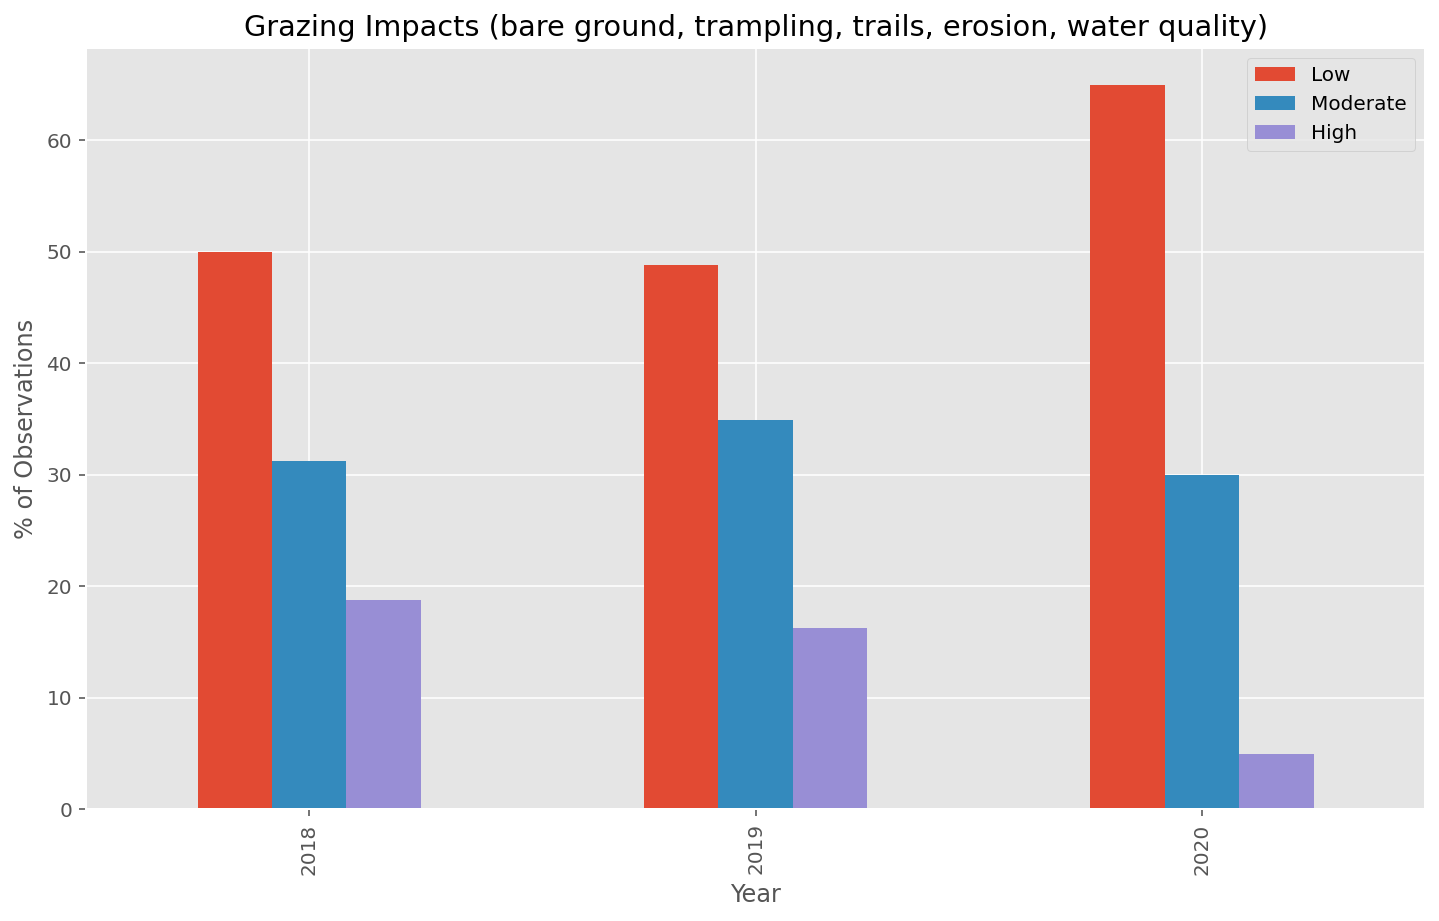

In [56]:
#Bar plot
axes = impact_pct_df.plot.bar()
plt.ylabel('% of Observations')
plt.xlabel('Year')
plt.title('Grazing Impacts (bare ground, trampling, trails, erosion, water quality)')
axes.legend(title='')

<Figure size 864x504 with 0 Axes>

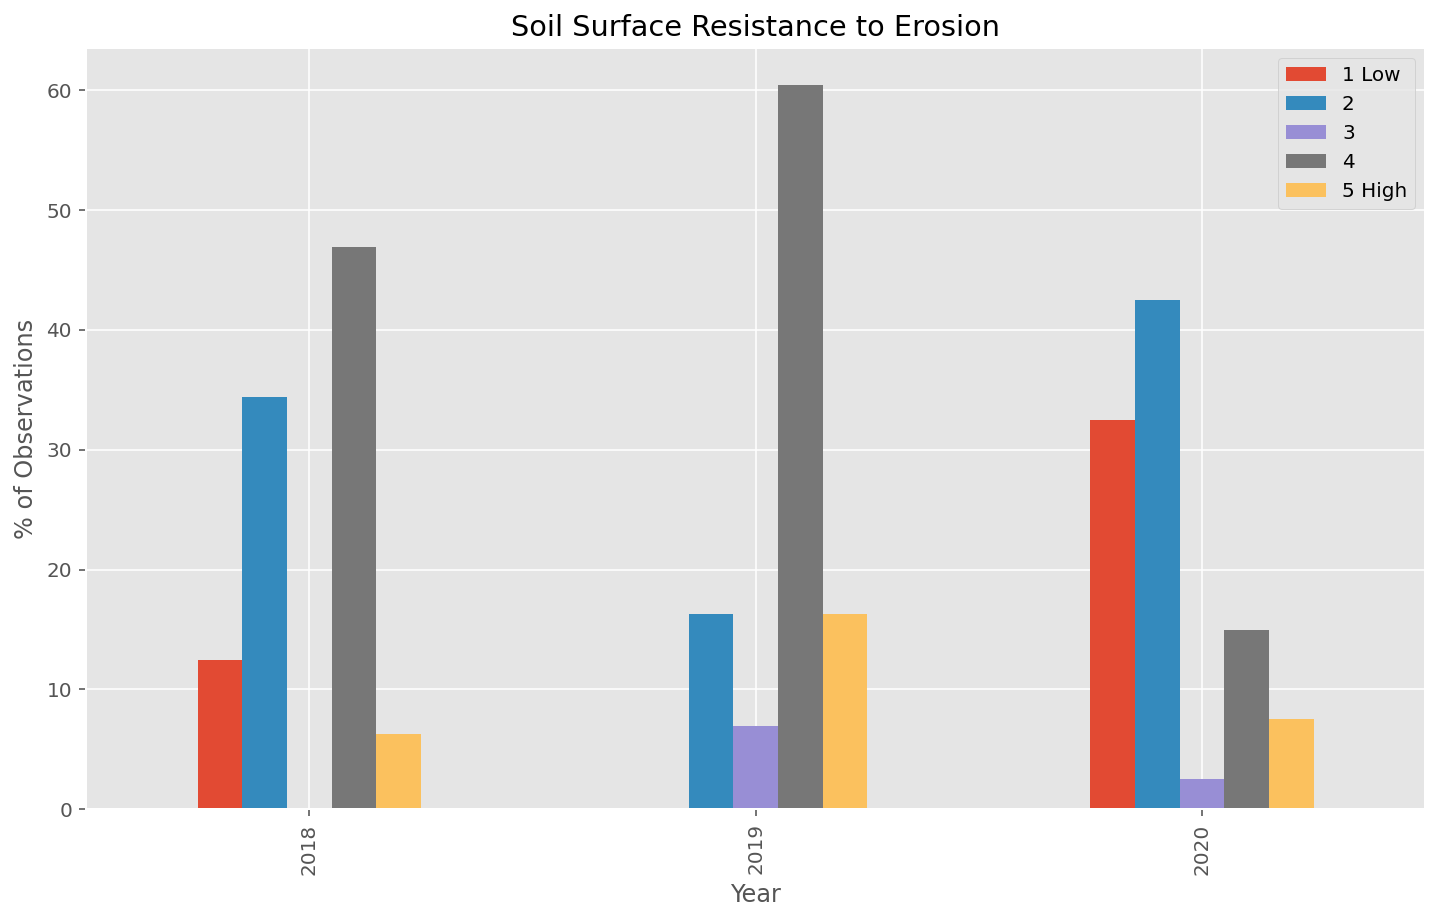

<Figure size 864x504 with 0 Axes>

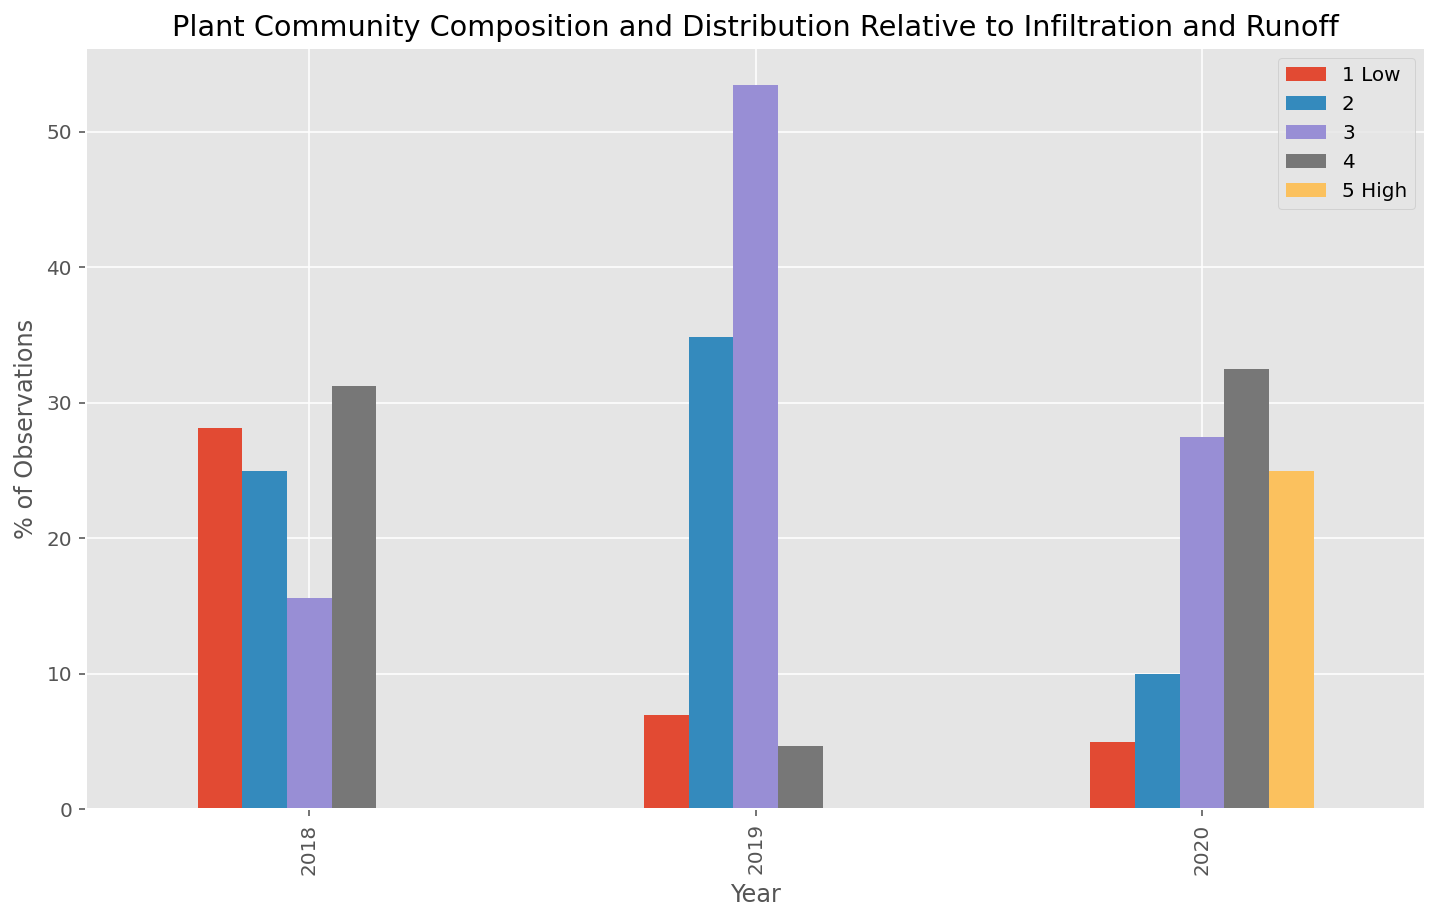

<Figure size 864x504 with 0 Axes>

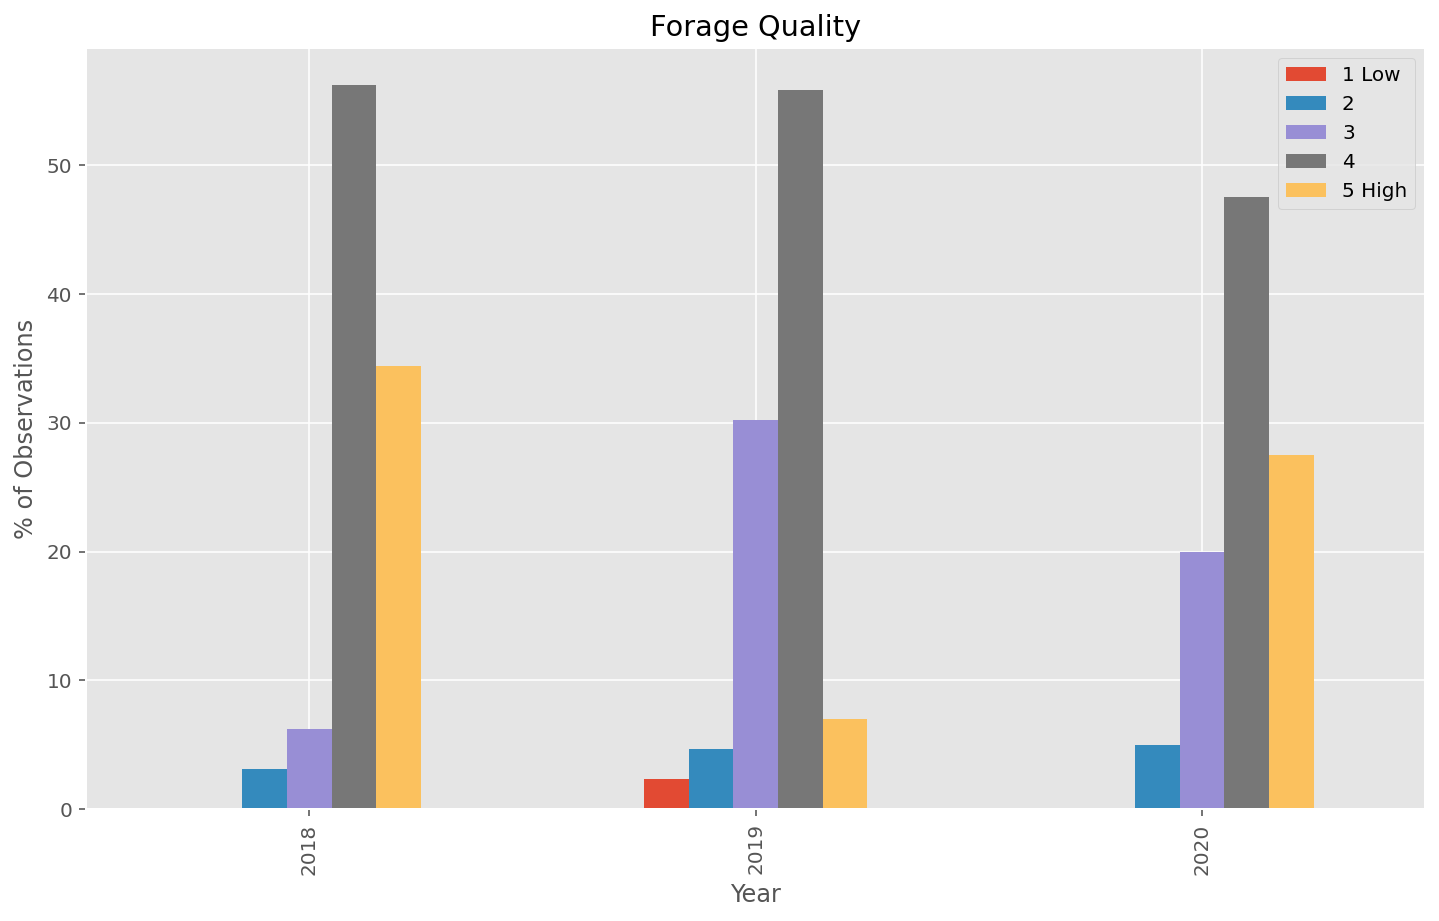

<Figure size 864x504 with 0 Axes>

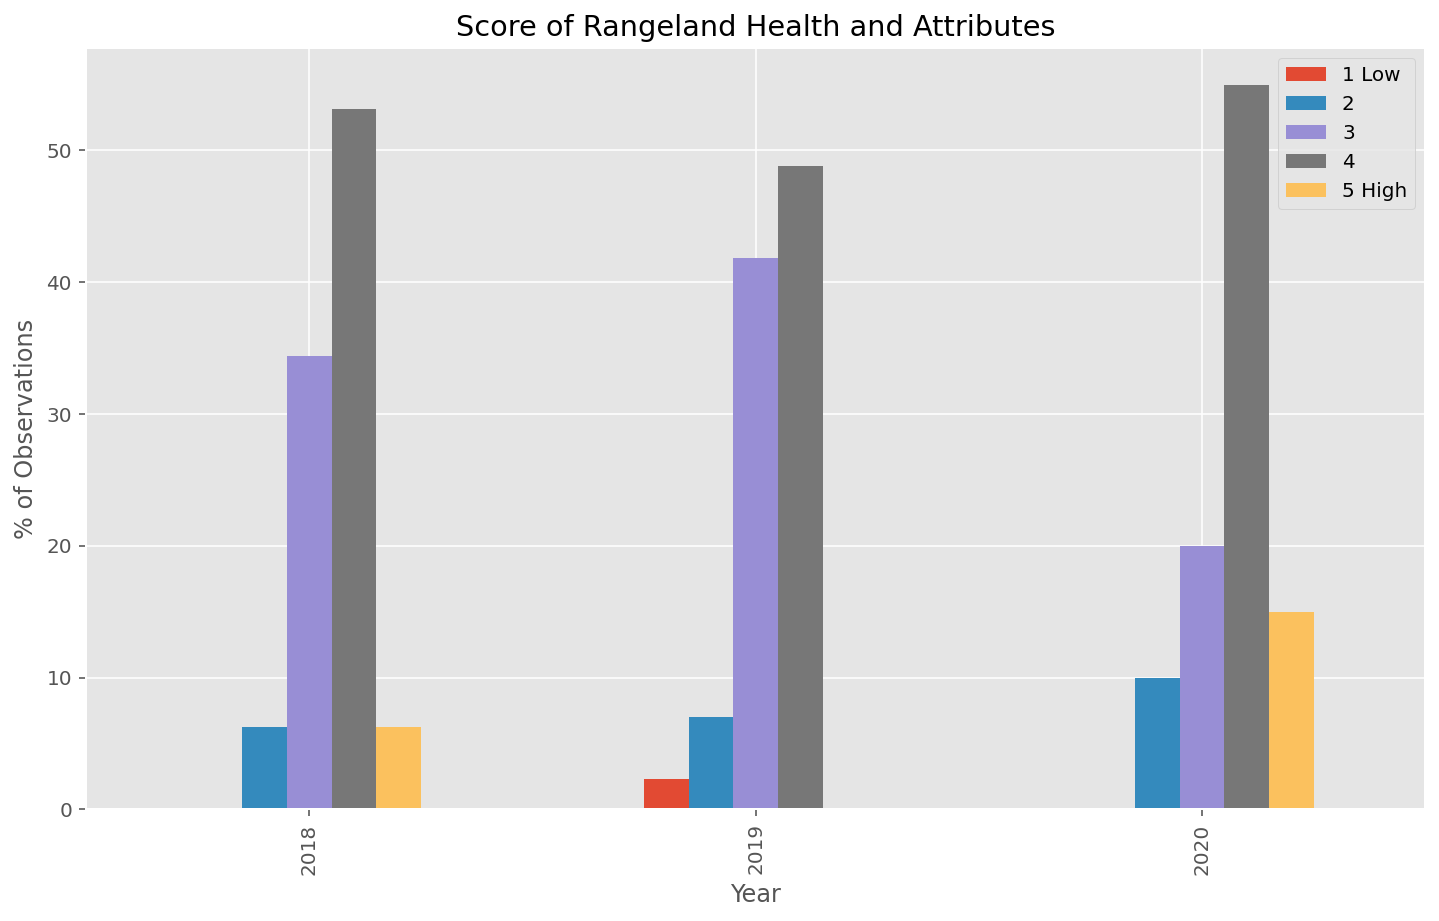

In [200]:
#Plots for variabels with 1 - 5 domain

title_dictionary= {'Erode2':'Soil Surface Resistance to Erosion','Plant1':'Plant Community Composition and Distribution Relative to Infiltration and Runoff','ForageQual':'Forage Quality','RangeScore':'Score of Rangeland Health and Attributes'}

vars_to_plot = ['Erode2','Plant1','ForageQual','RangeScore']

for var in vars_to_plot:
    # Count of observations per year
    obs_count_by_year = data.groupby('Year').size()

    # Percent of obsevations by variable
    pct = data.groupby(['Year',var]).size() / obs_count_by_year *100

    #Turn into dataframe
    pct_df = pct.unstack()
    
    #Bar plot
    fig = plt.figure()
    axes = pct_df.plot.bar()
    axes.set_ylabel('% of Observations')
    axes.set_xlabel('Year')
    axes.set_title(title_dictionary[var])
    axes.legend(['1 Low','2','3','4','5 High'])

In [0]:
#Remove 
assessable = data.loc[data.Compact != 'Could not assess',:]

# Count of observations per year
obs_count_by_year = assessable.groupby('Year').size()

# Percent of obsevations by variable
pct = assessable.groupby(['Year','Soil_Surf_Loss']).size() / obs_count_by_year *100

#Turn into dataframe
pct_df = pct.unstack()

#Bar plot
fig = plt.figure()
axes = pct_df.plot.bar()
axes.set_ylabel('% of Observations')
axes.set_xlabel('Year')
axes.set_title('Soil Surface Loss or Degradation')
axes.legend(['1 Low','2','3','4','5 High'])

month
3     100.0
4     100.0
6     100.0
7     100.0
10    100.0
dtype: float64
month
3     100.0
4       NaN
6     100.0
7     100.0
10    100.0
dtype: float64
month
3     100.0
4       NaN
6     100.0
7     100.0
10    100.0
dtype: float64
month
3     100.0
4       NaN
6     100.0
7     100.0
10    100.0
dtype: float64
month
3     100.0
4       NaN
6     100.0
7       NaN
10    100.0
dtype: float64
month
3     100.0
4       NaN
6     100.0
7     100.0
10    100.0
dtype: float64


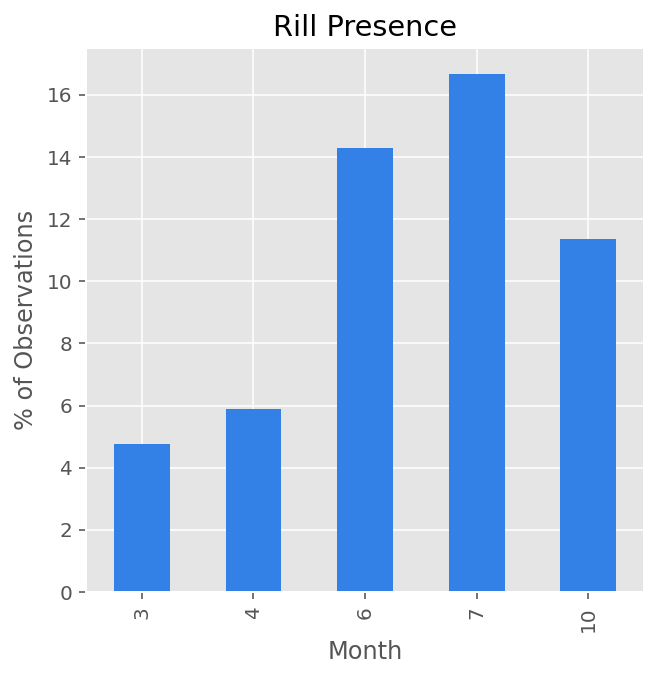

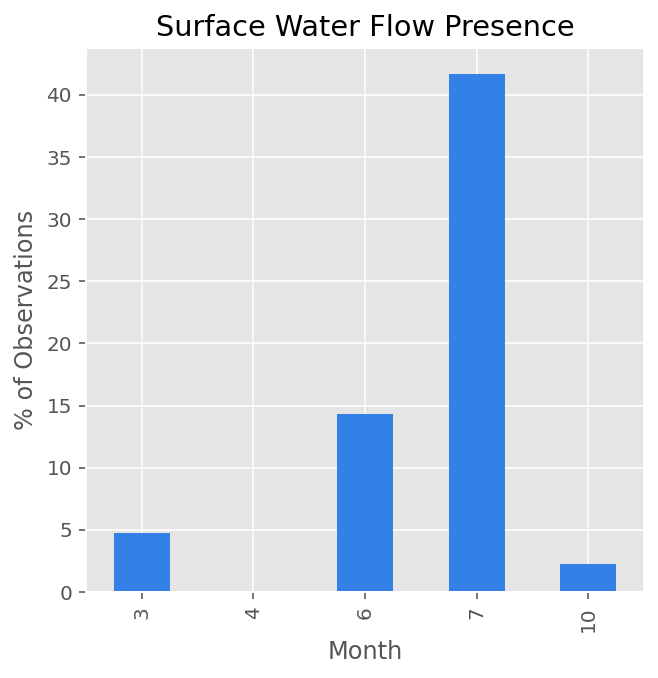

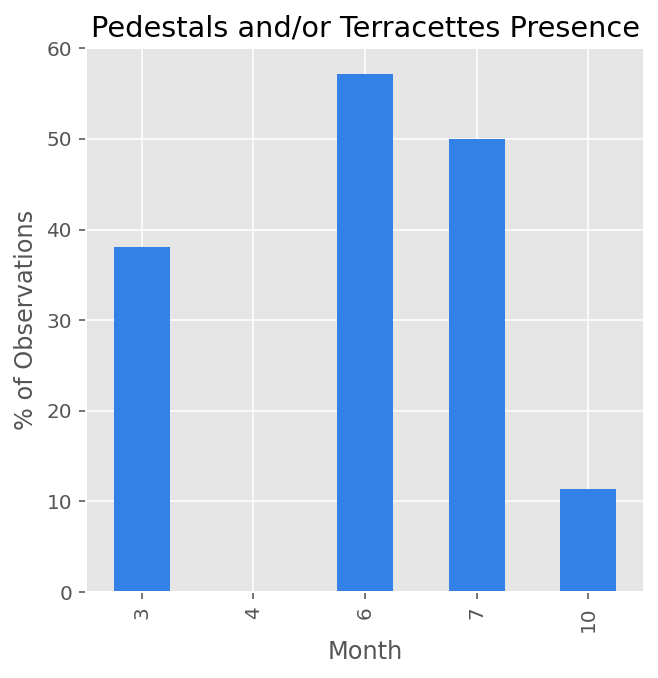

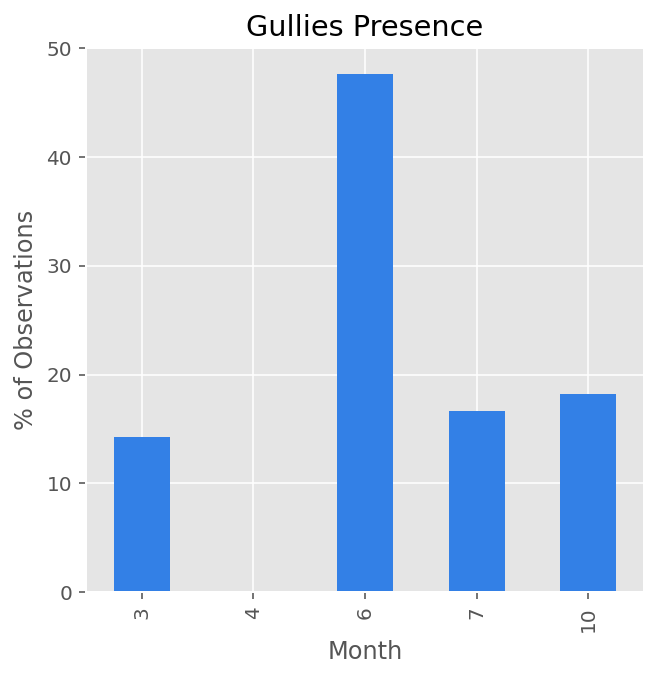

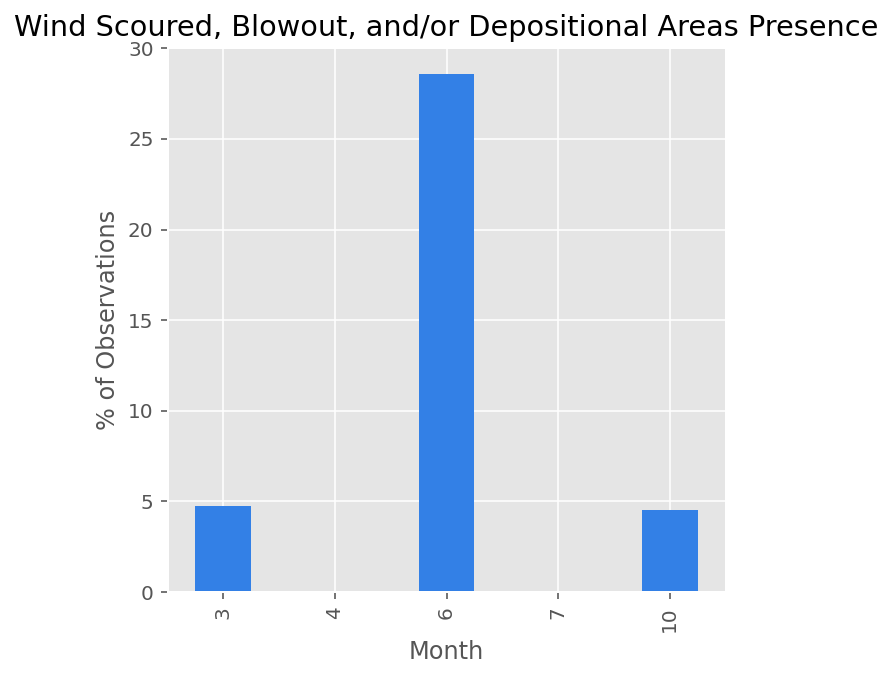

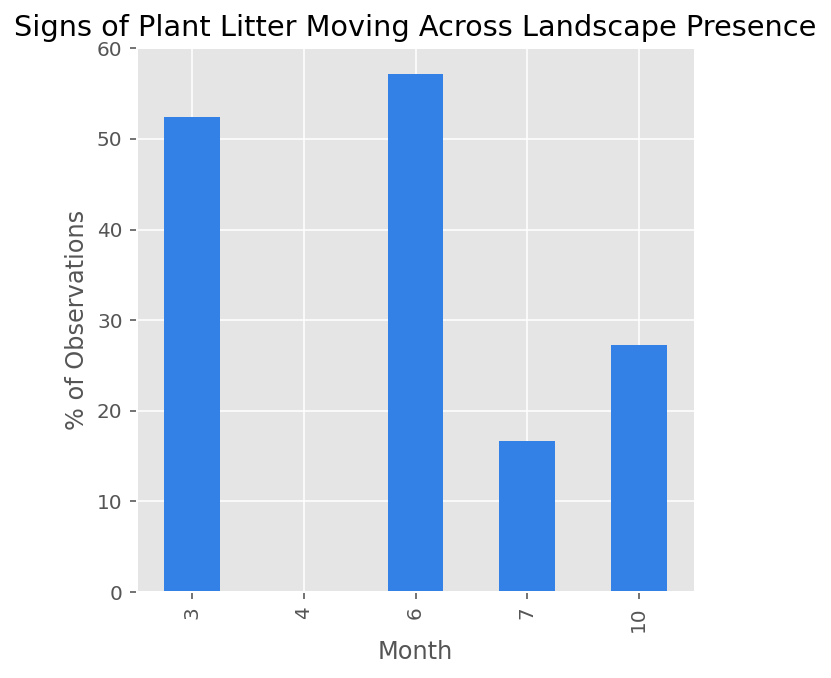

In [201]:
#Plots for variabels with Yes/No domain
title_dictionary= {'Rills':'Rill Presence','WatFlow':'Surface Water Flow Presence','PedTer':'Pedestals and/or Terracettes Presence','Gully':'Gullies Presence','Erode1':'Wind Scoured, Blowout, and/or Depositional Areas Presence','Litter':'Signs of Plant Litter Moving Across Landscape Presence'}

vars_to_plot = ['Rills','WatFlow','PedTer','Gully','Erode1','Litter']
    
for var in vars_to_plot:
    # Count of observations per year
    obs_count_by_year = data.groupby('month').size()

    # Percent of obsevations by variable
    pct = data.groupby(['month',var]).size() / obs_count_by_year *100

    #Turn into dataframe
    pct_df = pct.unstack()

    #Check add to 100
    print(pct_df.Yes + pct_df.No)

    #Bar plot
    fig = plt.figure()
    axes = pct_df['Yes'].plot.bar(figsize=(5,5), color=(.2,.5,.9))
    axes.set_ylabel('% of Observations')
    axes.set_xlabel('Month')
    axes.set_title(title_dictionary[var])

Year
2018      NaN
2019      NaN
2020    100.0
dtype: float64


Text(0.5, 1.0, 'Compaction Layer Presence')

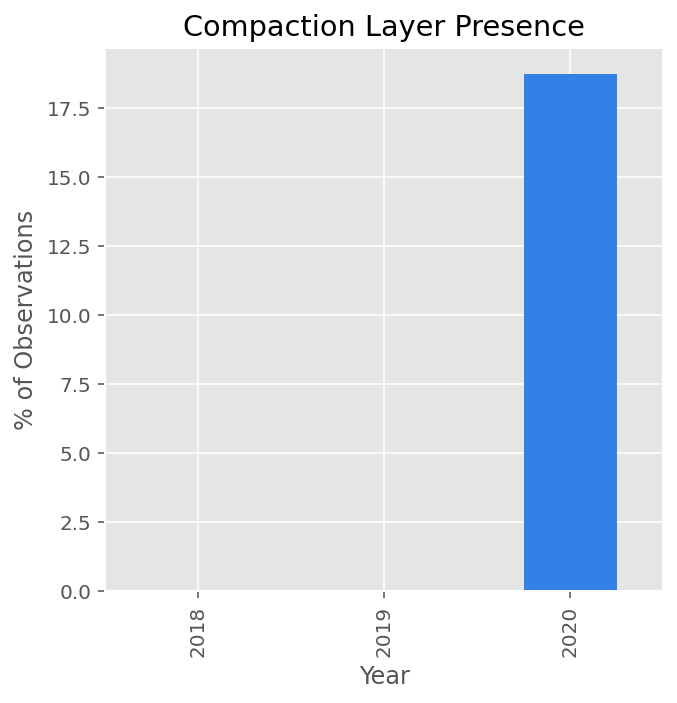

In [116]:
# Count of observations per year
assessable = data.loc[data.Compact != 'Could not assess',:]
obs_count_by_year = assessable.groupby('Year').size()

# Percent of obsevations by variable
pct = assessable.groupby(['Year','Compact']).size() / obs_count_by_year *100

#Turn into dataframe
pct_df = pct.unstack()

#Check add to 100
print(pct_df.Yes + pct_df.No)

#Bar plot
fig = plt.figure()
axes = pct_df['Yes'].plot.bar(figsize=(5,5), color=(.2,.5,.9))
axes.set_ylabel('% of Observations')
axes.set_xlabel('Year')
axes.set_title('Compaction Layer Presence')

In [22]:
#Soil/Site stability

#Create empty dataframe 

SoilSub = pd.DataFrame()

#loop through indicators of Soil/Site stability
for col in ['Rills', 'WatFlow', 'PedTer', 'BareGround', 'Gully', 'Erode1', 'Litter', 'Erode2', 'Soil_Surf_Loss', 'Compact']:
        
    #set num values for Yes/No fields
    if col in ['Rills', 'WatFlow', 'PedTer', 'Gully', 'Litter', 'Compact', 'Erode1', 'Soil_Surf_Loss']:
        SoilSub[col] = sub.loc[:,col].replace({'Yes':0, 'No':1, 'Could not assess':np.nan, None:np.nan})
        
#Add the rest of the fields to new dataframe
SoilSub['BareGround'] = sub.BareGround
SoilSub['Erode2'] = sub.Erode2

#Calculate perecntages of indicators, grouped together by field type (Yes/No, 1-5 range, or raw %), then give weights

#Formula, where I = Indicator, M = Max possible sum of indicators, N = Total indicators P = Number of indicators of the given data range
#Weighted percent = ((I(0) + I(1) + ... + I(M)) / M) * (P/N) *100


#For Y/N answers, the inverse fraction from (I(0) + I(1) + ... + I(M)) / M) is taken because they are describing negative traits.



        
SoilSub
        

,Rills,WatFlow,PedTer,Gully,Erode1,Litter,Soil_Surf_Loss,Compact,BareGround,Erode2
105,1,1,0,1,1,1,2,0.0,40.0,4.0
106,1,1,1,1,1,1,NaN,NaN,2.0,4.0
107,1,1,1,1,1,1,2,1.0,2.0,4.0
108,1,1,1,1,1,1,NaN,NaN,9.0,4.0
109,1,1,1,1,1,1,NaN,NaN,3.0,5.0
110,0,0,0,1,0,1,4,0.0,99.0,5.0
111,1,1,0,1,1,1,NaN,NaN,2.0,2.0
112,1,1,1,1,1,1,NaN,NaN,0.0,4.0
113,1,1,0,1,1,1,3,1.0,0.0,4.0
114,1,1,1,1,1,0,NaN,1.0,0.0,5.0


In [23]:
#Soil/Site stability

#Create empty dataframe 

SoilSub = pd.DataFrame()

#loop through indicators of Soil/Site stability
for col in ['Rills', 'WatFlow', 'PedTer', 'BareGround', 'Gully', 'Erode1', 'Litter', 'Erode2', 'Soil_Surf_Loss', 'Compact']:
    
    #set num values for Yes/No fields
    if col in ['Rills', 'WatFlow', 'PedTer', 'Gully', 'Litter', 'Compact', 'Erode1', 'Soil_Surf_Loss']:
        SoilSub[col] = sub.loc[:,col].replace({'Yes':0, 'No':1, 'Could not assess':np.nan, None:np.nan})
        
#Add the rest of the fields to new dataframe
SoilSub['BareGround'] = sub.BareGround
SoilSub['Erode2'] = sub.Erode2

#Calculate perecntages of indicators, grouped together by field type (Yes/No, 1-5 range, or raw %), then give weights

#Formula, where I = Indicator, M = Max possible sum of indicators, N = Total indicators P = Number of indicators of the given data range
#Weighted percent = ((I(0) + I(1) + ... + I(M)) / M) * (P/N) *100


#For Y/N answers, the inverse fraction from (I(0) + I(1) + ... + I(M)) / M) is taken because they are describing negative traits.

SoilSub['YN'] = ((1-((SoilSub.Rills + SoilSub.WatFlow + SoilSub.PedTer + SoilSub.Gully + SoilSub.Erode1 + SoilSub.Litter + SoilSub.Compact)/7)) * (7/10) * 100)
SoilSub['Five'] = (((SoilSub.Erode2 + SoilSub.Soil_Surf_Loss) / 10) * (2/10) * 100)
SoilSub['BG'] = (SoilSub.BareGround) * (1/10)

# Add together weighted percentages
SoilSub['TotalPercentage'] = SoilSub.YN + SoilSub.Five + SoilSub.BG

#Bin percentages to fit a 1-5 scale, so that a score of 0-20% = 1, 20-40% = 2, etc
SoilBins = [0, 20, 40, 60, 80, 100]
SoilBinsLab = [1, 2, 3, 4, 5]

SoilSub['BinnedScore'] = pd.cut(SoilSub['TotalPercentage'], bins = SoilBins, labels = SoilBinsLab)

SoilSub

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [24]:
#Hydrologic Function

#Create empty dataframe 

HydroSub = pd.DataFrame()

#loop through indicators of Hydrologic Function
for col in ['Rills', 'WatFlow', 'PedTer', 'BareGround', 'Gully', 'Erode2', 'Soil_Surf_Loss', 'Plant1', 'Compact', 'Litter']:
    
    #set num values for Yes/No fields
    if col in ['Rills', 'WatFlow', 'PedTer', 'Gully', 'Compact', 'Litter', 'Soil_Surf_Loss']:
        HydroSub[col] = sub.loc[:,col].replace({'Yes':0, 'No':1, 'Could not assess':np.nan, None:np.nan})
        
#Add the rest of the fields to new dataframe
HydroSub['BareGround'] = sub.BareGround
HydroSub['Erode2'] = sub.Erode2
HydroSub['Plant1'] = sub.Plant1

#Calculate perecntages of indicators, grouped together by field type (Yes/No, 1-5 range, or raw %), then give weights
#For Y/N answers, the inverse fraction is taken because they are all describing negative traits.
HydroSub['YN'] = (((1-((HydroSub.Rills + HydroSub.WatFlow + HydroSub.PedTer + HydroSub.Gully + HydroSub.Litter + HydroSub.Compact)/6) * (6/10))) *100)
HydroSub['Five'] = (((HydroSub.Erode2 + HydroSub.Soil_Surf_Loss) / 15) * (3/10) *100)
HydroSub['BG'] = (HydroSub.BareGround) * (1/10)

# Add together weighted percentages
HydroSub['TotalPercentage'] = HydroSub.YN + HydroSub.Five + HydroSub.BG

#Bin percentages to fit a 1-5 scale, so that a score of 0-20% = 1, 20-40% = 2, etc
HydroBins = [0, 20, 40, 60, 80, 100]
HydroBinsLab = [1, 2, 3, 4, 5]

HydroSub['BinnedScore'] = pd.cut(HydroSub['TotalPercentage'], bins = HydroBins, labels = HydroBinsLab)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [0]:
#Biotic integrity

#Create empty dataframe

BioSub = pd.DataFrame()

#loop through indicators of Biotic integrity
for col in ['Erode2', 'Soil_Surf_Loss', 'Compact', 'Func', 'Litter', 'NNIP', 'Plant3']:
    # set num values for 'Low/Moderate/High' fields
    if col in ['Func', 'NNIP', 'Plant3', 'Litter', 'Compact', 'Soil_Surf_Loss']:
        BioSub[col] = sub.loc[:,col].replace({'Low':1, 'Moderate':2,'High':3, 'Yes':1, 'No':0, 'Could not assess':np.nan, None:np.nan})
        
    #Add remaining fields to empty dataframe
BioSub['Erode2'] = sub.Erode2

#Calculate percentages, then weights
#For Y/N answers, the inverse fraction is taken because they are all describing negative traits.
BioSub['YN'] = (((1-((BioSub.Litter + BioSub.Compact)/2)) * (2/7)) * 100)
BioSub['Three'] = (((BioSub.Func + BioSub.NNIP + BioSub.Plant3) / 9) * (3/7) * 100)
BioSub['Five'] = (((BioSub.Erode2 + BioSub.Soil_Surf_Loss) / 10) * (2/7) * 100)

BioSub['TotalPercentage'] = BioSub.YN + BioSub.Three + BioSub.Five

BioBins = [0, 20, 40, 60, 80, 100]
BioBinsLab = [1, 2, 3, 4, 5]
BioSub['BinnedScore'] = pd.cut(BioSub['TotalPercentage'], bins = BioBins, labels = BioBinsLab)


In [25]:
PooledSub = pd.DataFrame()

PooledSub['AveragePercentage'] = (SoilSub.TotalPercentage + HydroSub.TotalPercentage + BioSub.TotalPercentage) / 3

PooledBins = [0, 20, 40, 60, 80, 100]
PooledBinsLab = [1, 2, 3, 4, 5]
PooledSub['CalculatedScore'] = pd.cut(PooledSub['AveragePercentage'], bins = PooledBins, labels = PooledBinsLab)

PooledSub['HumanScore'] = sub.RangeScore

sub['CalculatedScore'] = PooledSub.CalculatedScore

PooledSub.CalculatedScore.describe()

PooledSub['Difference'] = PooledSub.CalculatedScore.astype('float') - PooledSub.HumanScore
PooledSub.Difference.hist()

PooledSub

AttributeError: 'DataFrame' object has no attribute 'TotalPercentage'

In [26]:
obs_count = data.groupby('Year').size()
data['Year'] = pd.DatetimeIndex(data['Observation_Date']).year
data.groupby('Year').ForageQual.value_counts().sort_index()

KeyError: 'Year'

In [27]:
print('% Alive and Dead')
data.groupby('Year').ForageQual.value_counts() / obs_count *100

% Alive and Dead


KeyError: 'Year'

In [28]:
df = sub.groupby(['RangeScore']).sum()
df.head(5)

,OBJECTID_12,PctCover,BareGround,ForageQual,Erode2,Plant1
RangeScore,,,,,,
2.0,385,199.0,101.0,8.0,11.0,12.0
3.0,501,349.0,51.0,13.0,17.0,14.0
4.0,379,295.0,5.0,13.0,13.0,10.0


# Export data deliverable

In [23]:
data.columns


Index(['OBJECTID', 'Habitat_Ty', 'BHRSite', 'Surveyor1', 'Surveyor2',
       'DomSpeci_2', 'GlobalID', 'PctCover', 'BareGround', 'GrazeLevel',
       'GrazeImpact', 'RangeScore', 'ForageQual', 'Rills', 'WatFlow', 'PedTer',
       'Gully', 'Erode1', 'Litter', 'Erode2', 'Plant1', 'Compact', 'Func',
       'NNIP', 'Plant3', 'Observation_Date', 'Comments_L', 'Soil_Surf_Loss',
       'RDM_Plot_Number', 'Complete', 'SHAPE'],
      dtype='object')

In [29]:
# drop and rename columns
data = data.drop(columns=['Complete'])
data = data.rename(columns={'OBJECTID':'Object ID','GlobalID':'Global ID'})

In [30]:
field_order = [
    'BHRSite',
    'Observation_Date',
    'Surveyor1',
    'Surveyor2',
    'Habitat_Ty',
    'RDM_Plot_Number',
    'DomSpeci_2',
    'PctCover',
    'BareGround',
    'GrazeLevel',
    'GrazeImpact',
    'RangeScore',
    'ForageQual',
    'Rills',
    'WatFlow',
    'PedTer',
    'Gully',
    'Erode1',
    'Litter',
    'Erode2',
    'Plant1',
    'Compact',
    'Func',
    'NNIP',
    'Plant3',
    'Soil_Surf_Loss',
    'Comments_L',
    'Object ID',
    'Global ID',
    'SHAPE'
]

In [31]:
export_data_deliverable(data, feature_service, field_order, file_name='Rangelend_Assessment')

Exported to Outputs/Rangelend_Assessment_Data_20211029.xlsx
